Dataset Loaded Successfully

Shape: (2568, 16)

Columns:
 ['Child_ID', 'age', 'gender', 'race_ethnicity', 'SES', 'neighborhood_resources', 'housing_stability', 'insurance_status', 'family_income', 'parental_education', 'neighborhood_characteristics', 'healthcare_access', 'ADHD', 'anxiety', 'depression', 'epilepsy']

Data Types:
 Child_ID                          int64
age                               int64
gender                           object
race_ethnicity                   object
SES                              object
neighborhood_resources           object
housing_stability                object
insurance_status                 object
family_income                   float64
parental_education               object
neighborhood_characteristics     object
healthcare_access                object
ADHD                              int64
anxiety                           int64
depression                        int64
epilepsy                          int64
dtype: object

Missing Values

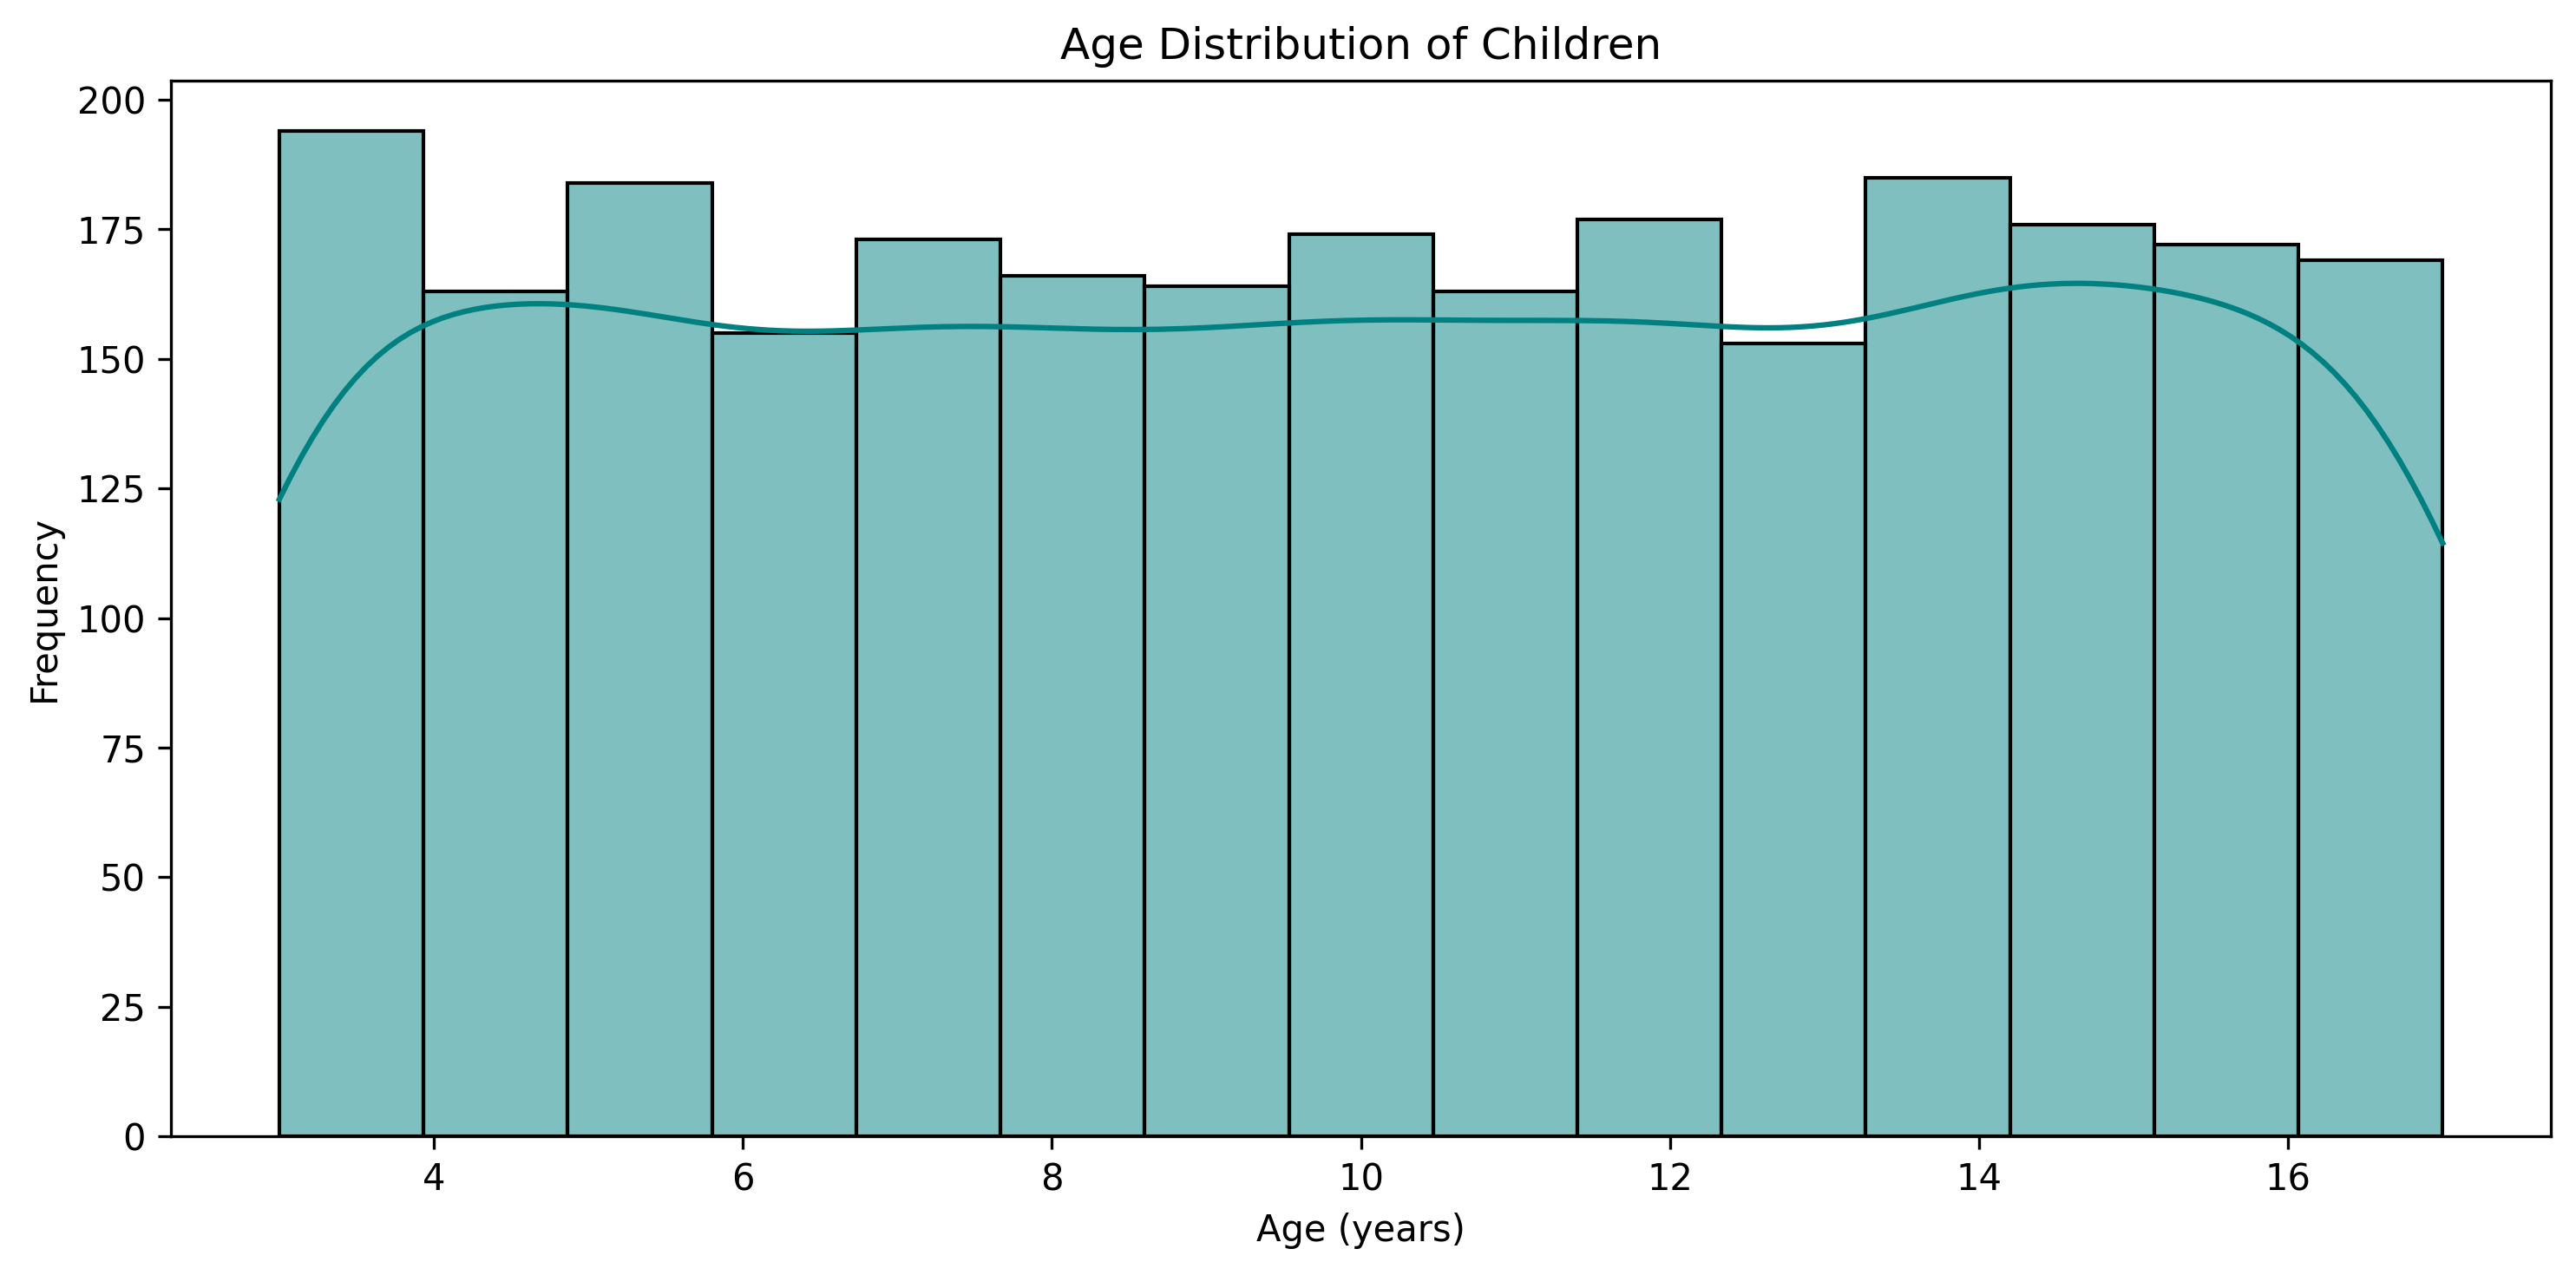

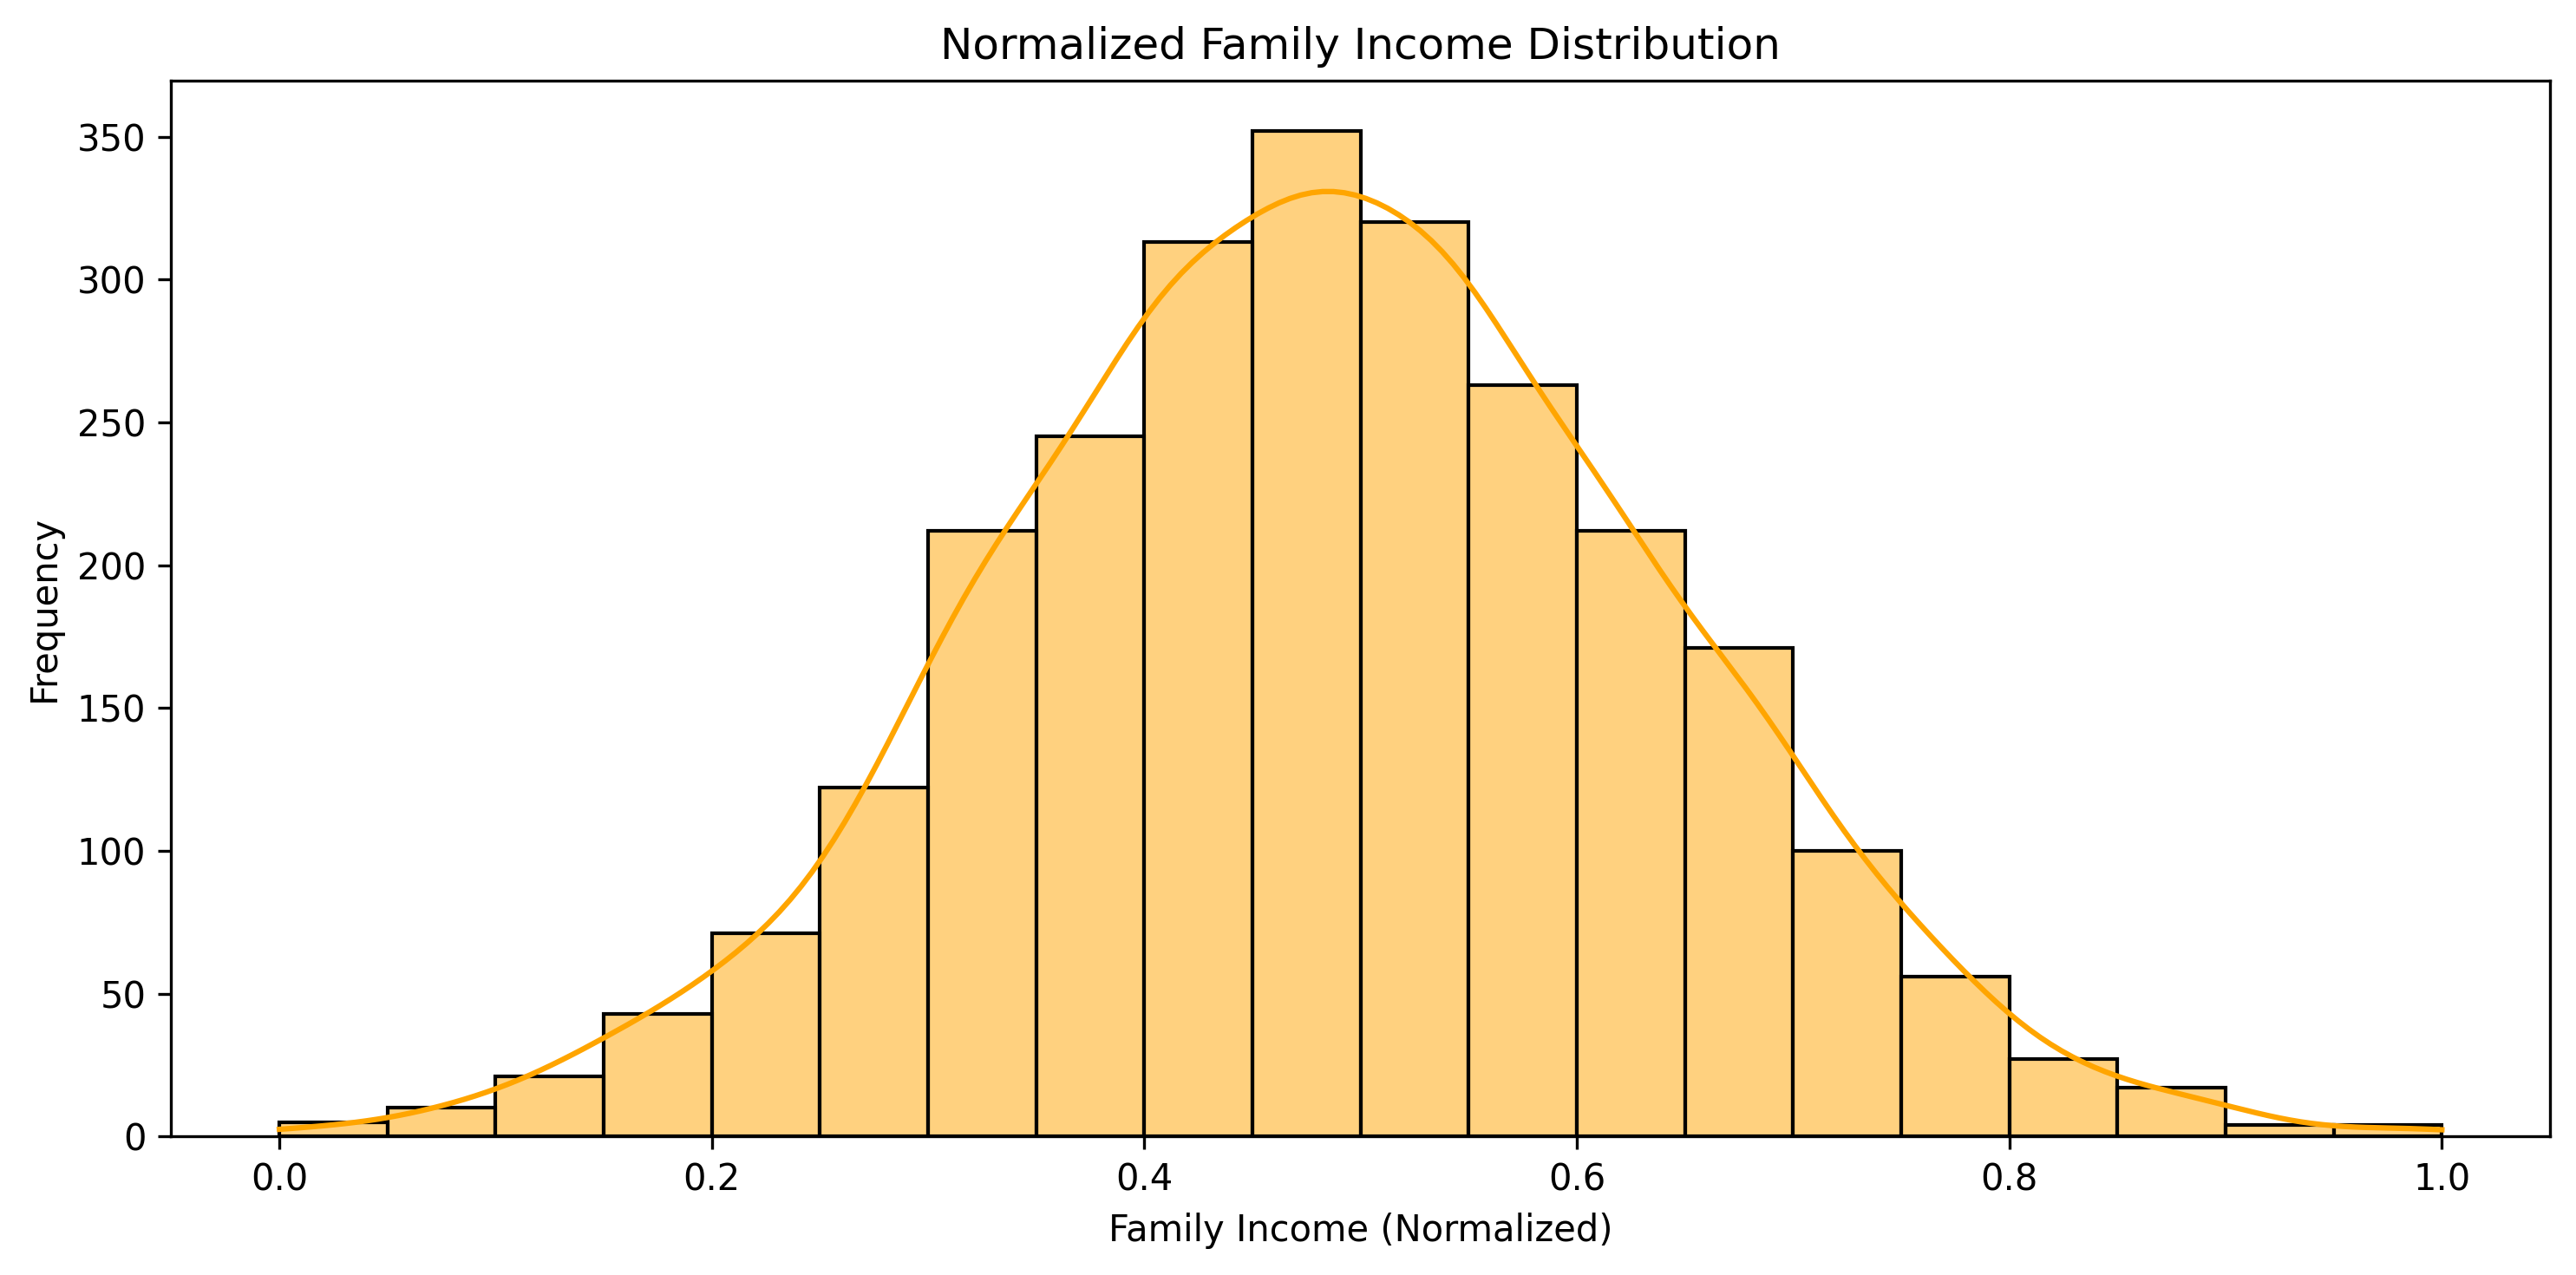

/tmp/ipython-input-3471067427.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comorbidity_rates.index, y=comorbidity_rates.values, palette="viridis")


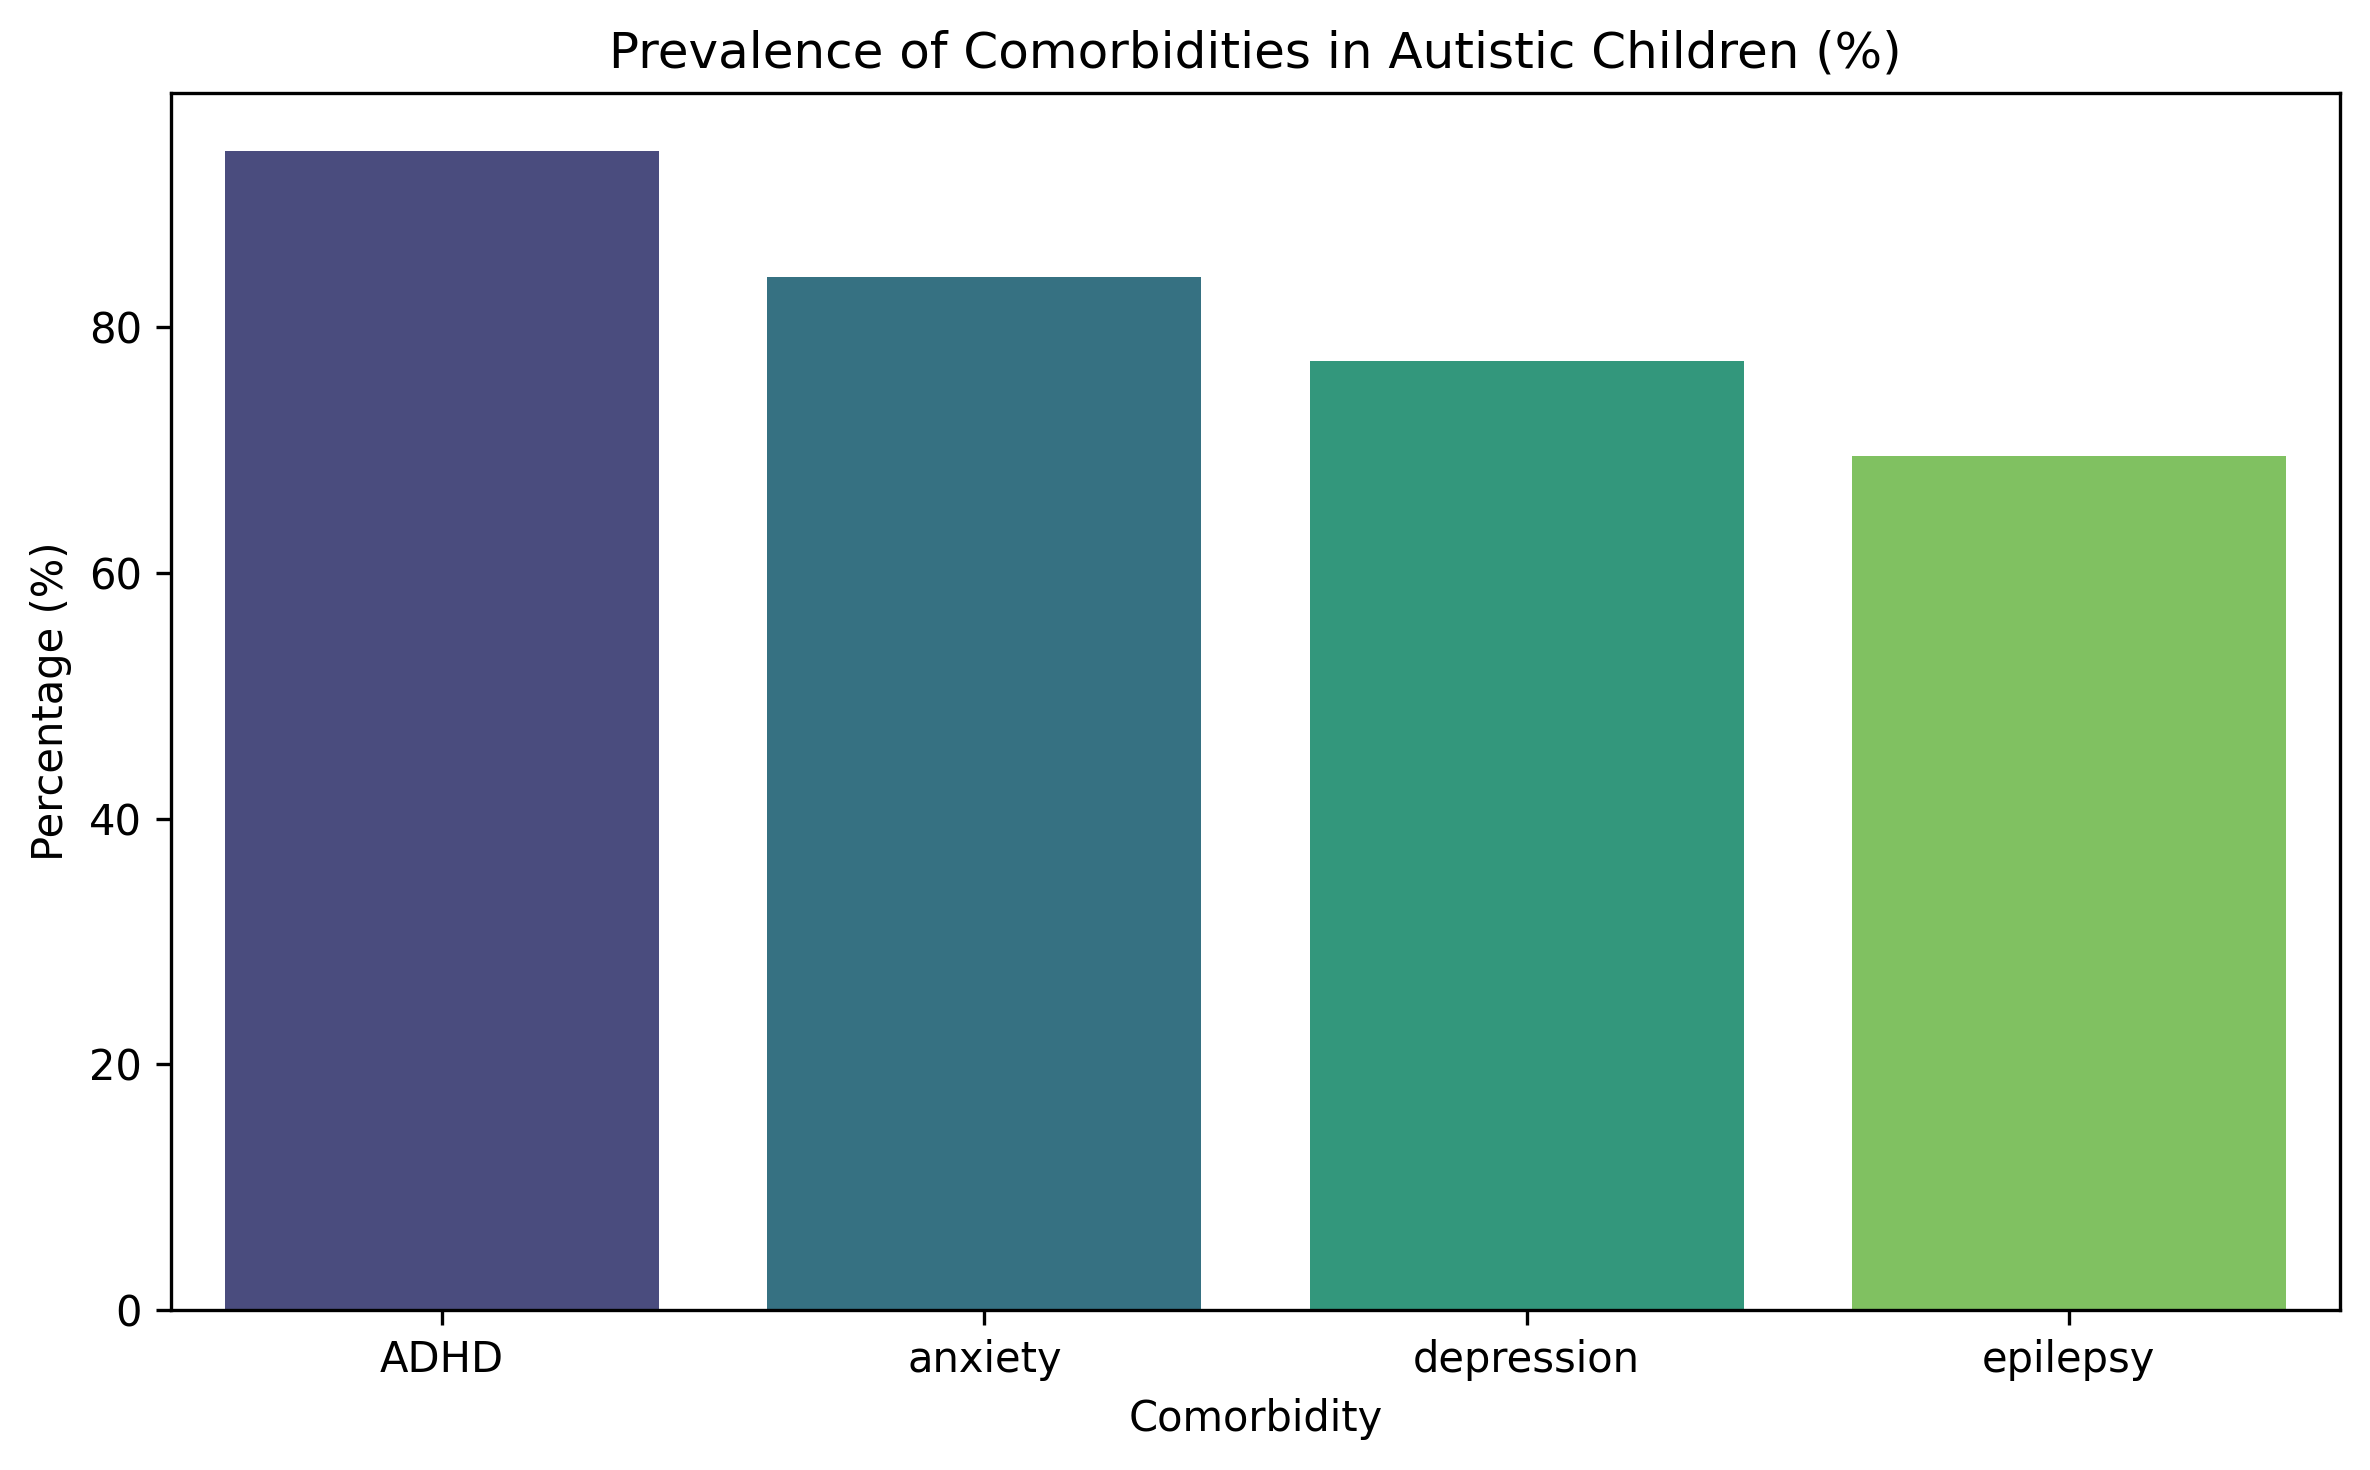


Comorbidity Prevalence (%):
 ADHD          94.31
anxiety       84.07
depression    77.22
epilepsy      69.51
dtype: float64


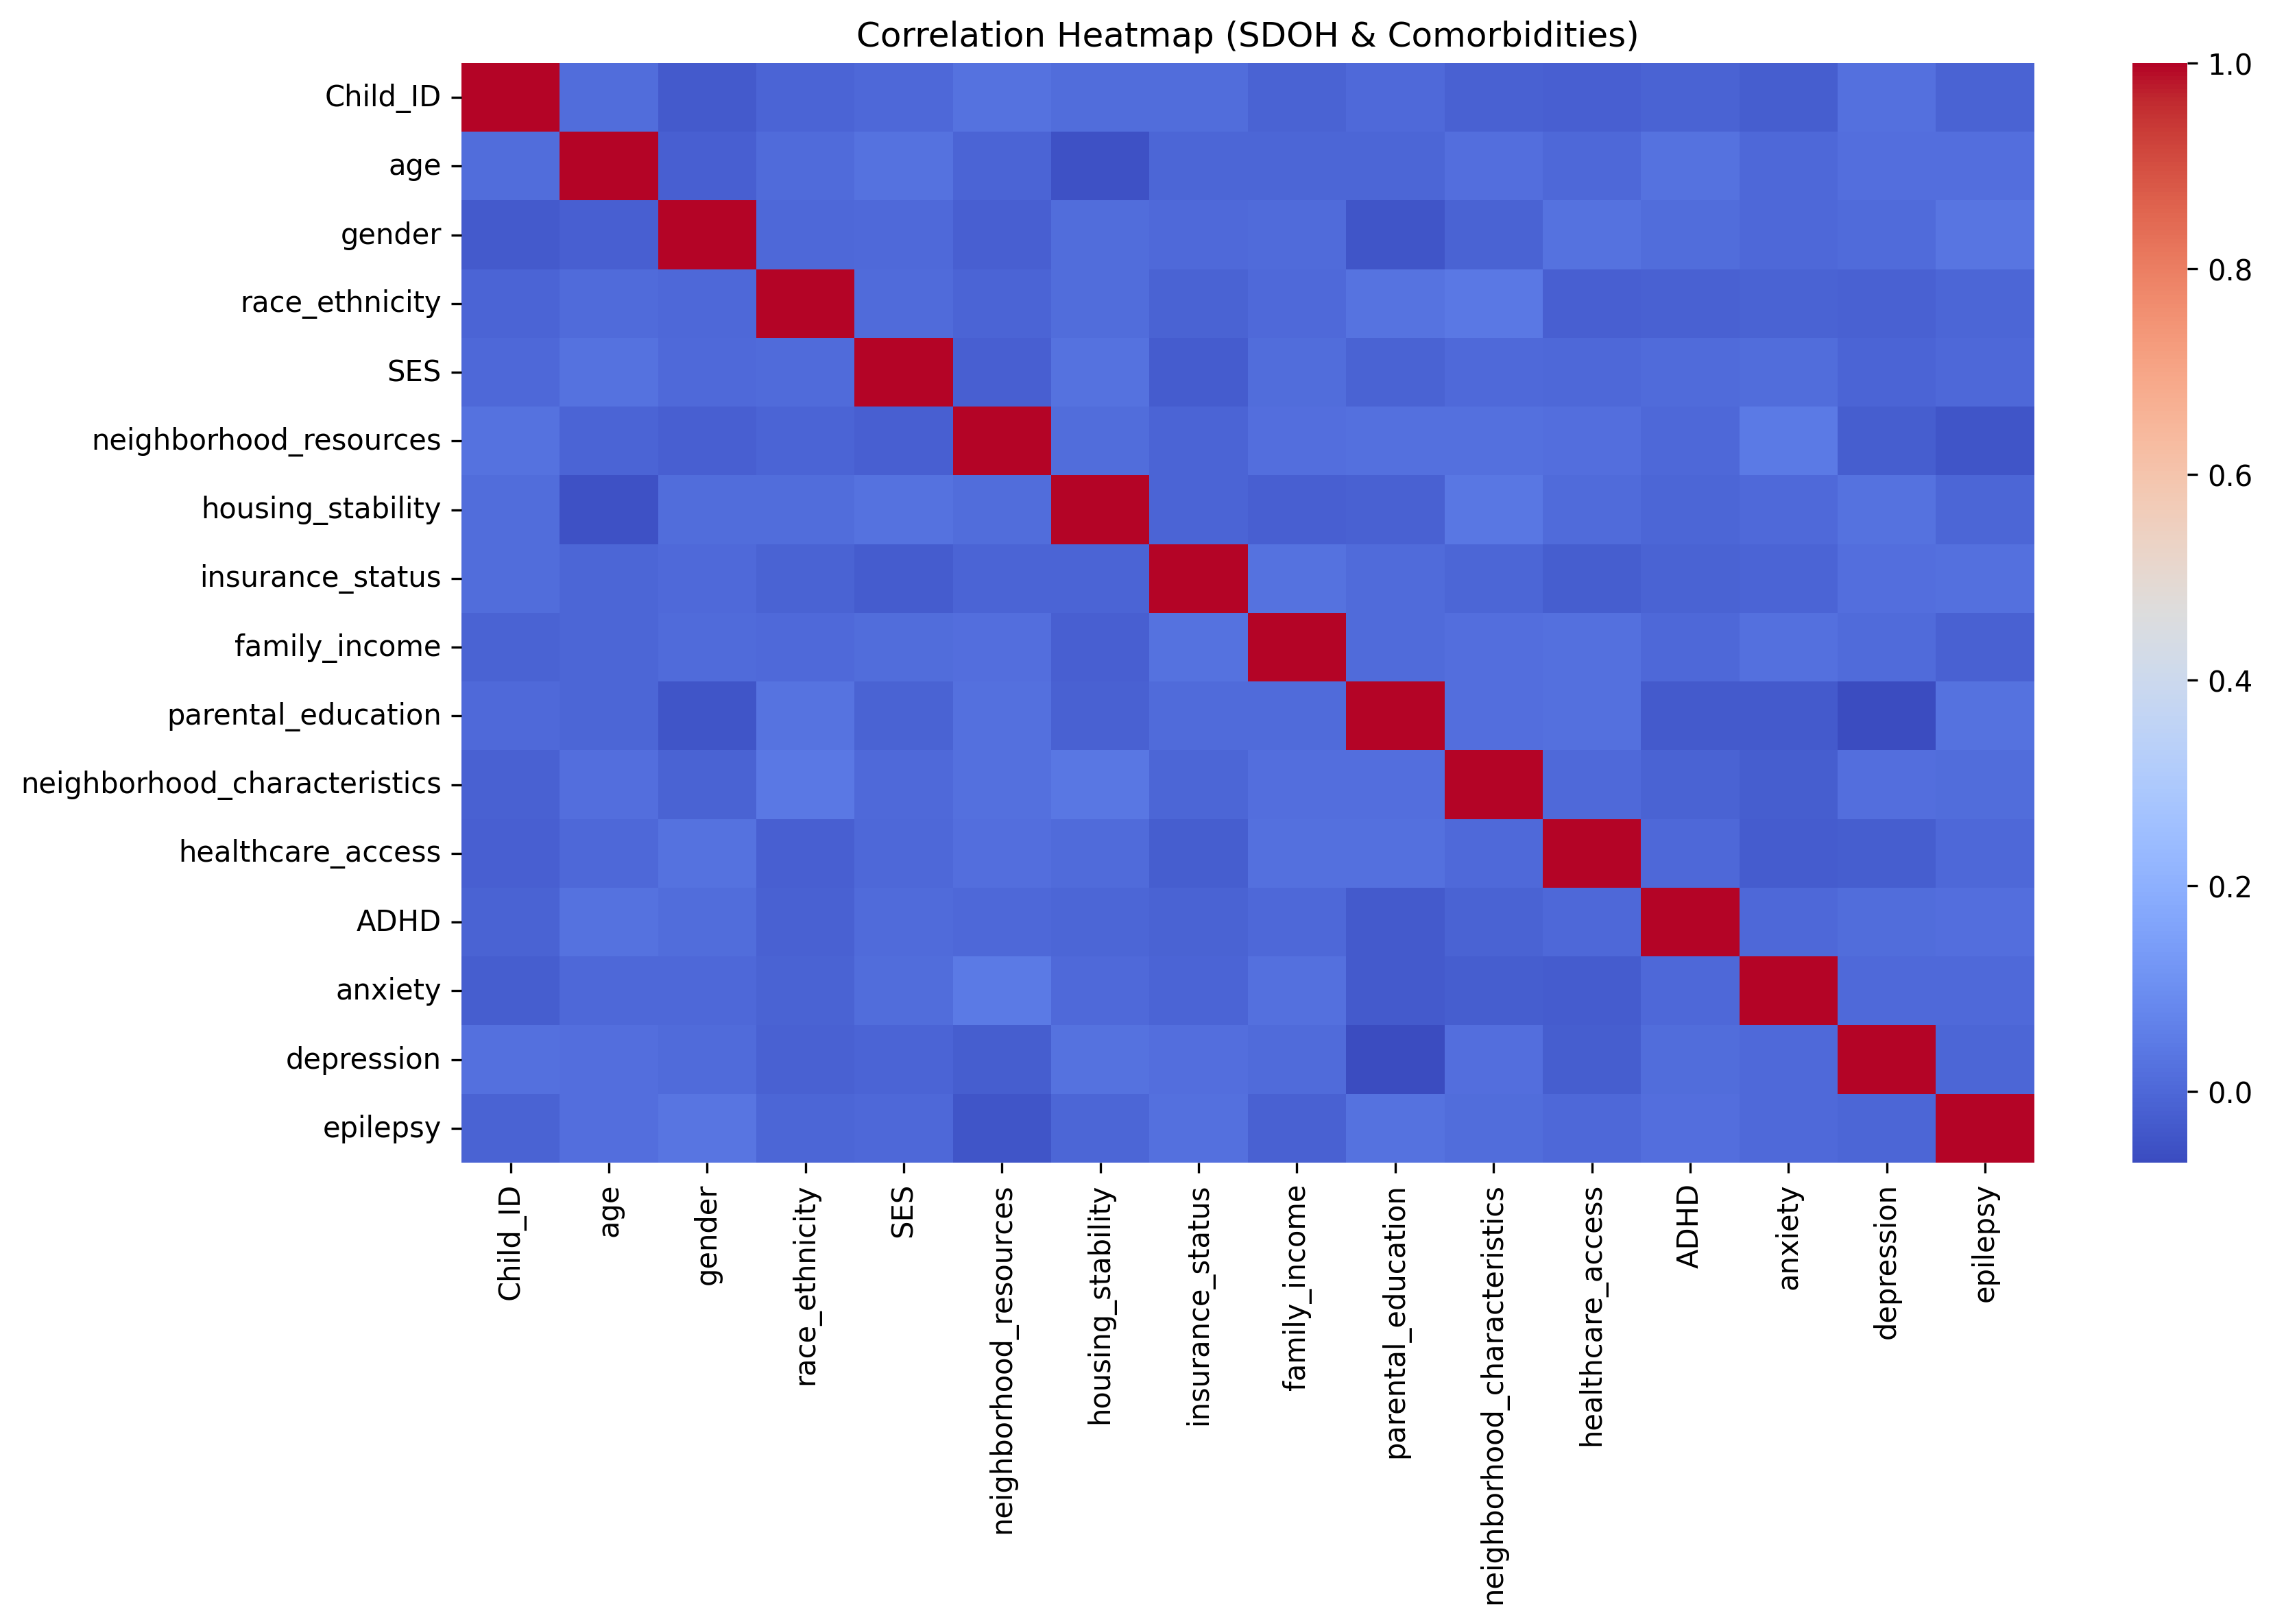


Correlations of SDOH Predictors with Comorbidities:

                    ADHD  anxiety  depression  epilepsy
SES                 0.01     0.01       -0.01      0.00
parental_education -0.04    -0.03       -0.07      0.02
insurance_status   -0.01    -0.01        0.01      0.02
healthcare_access   0.00    -0.03       -0.02     -0.00
family_income       0.00     0.02        0.01     -0.02


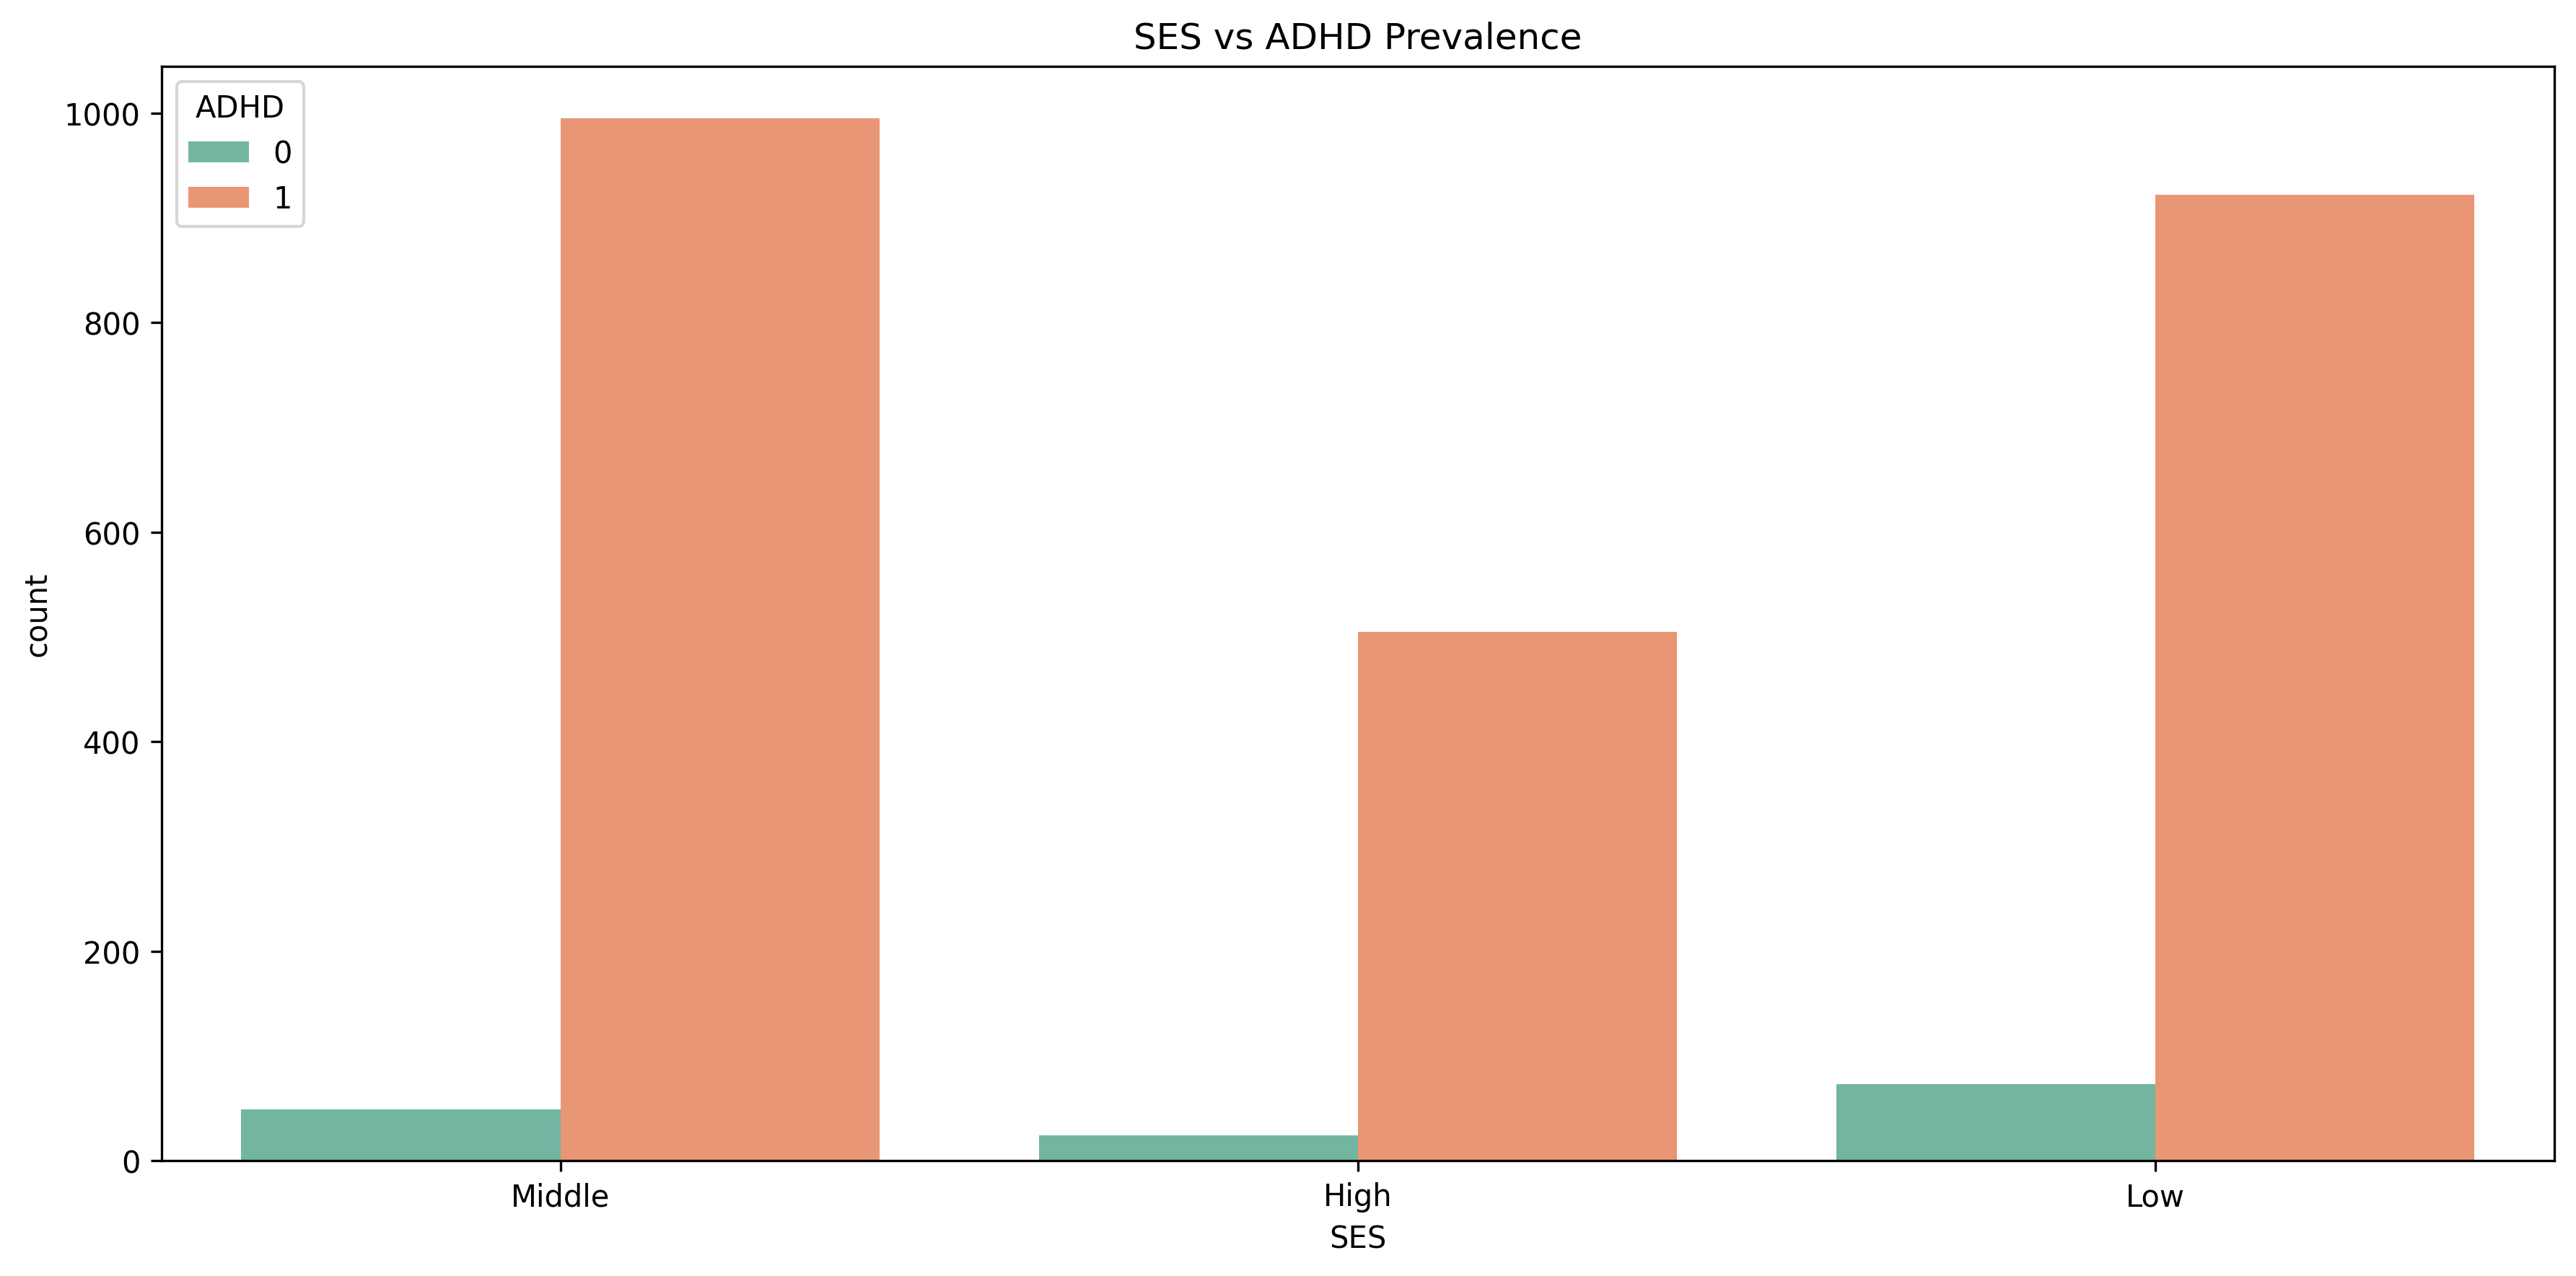

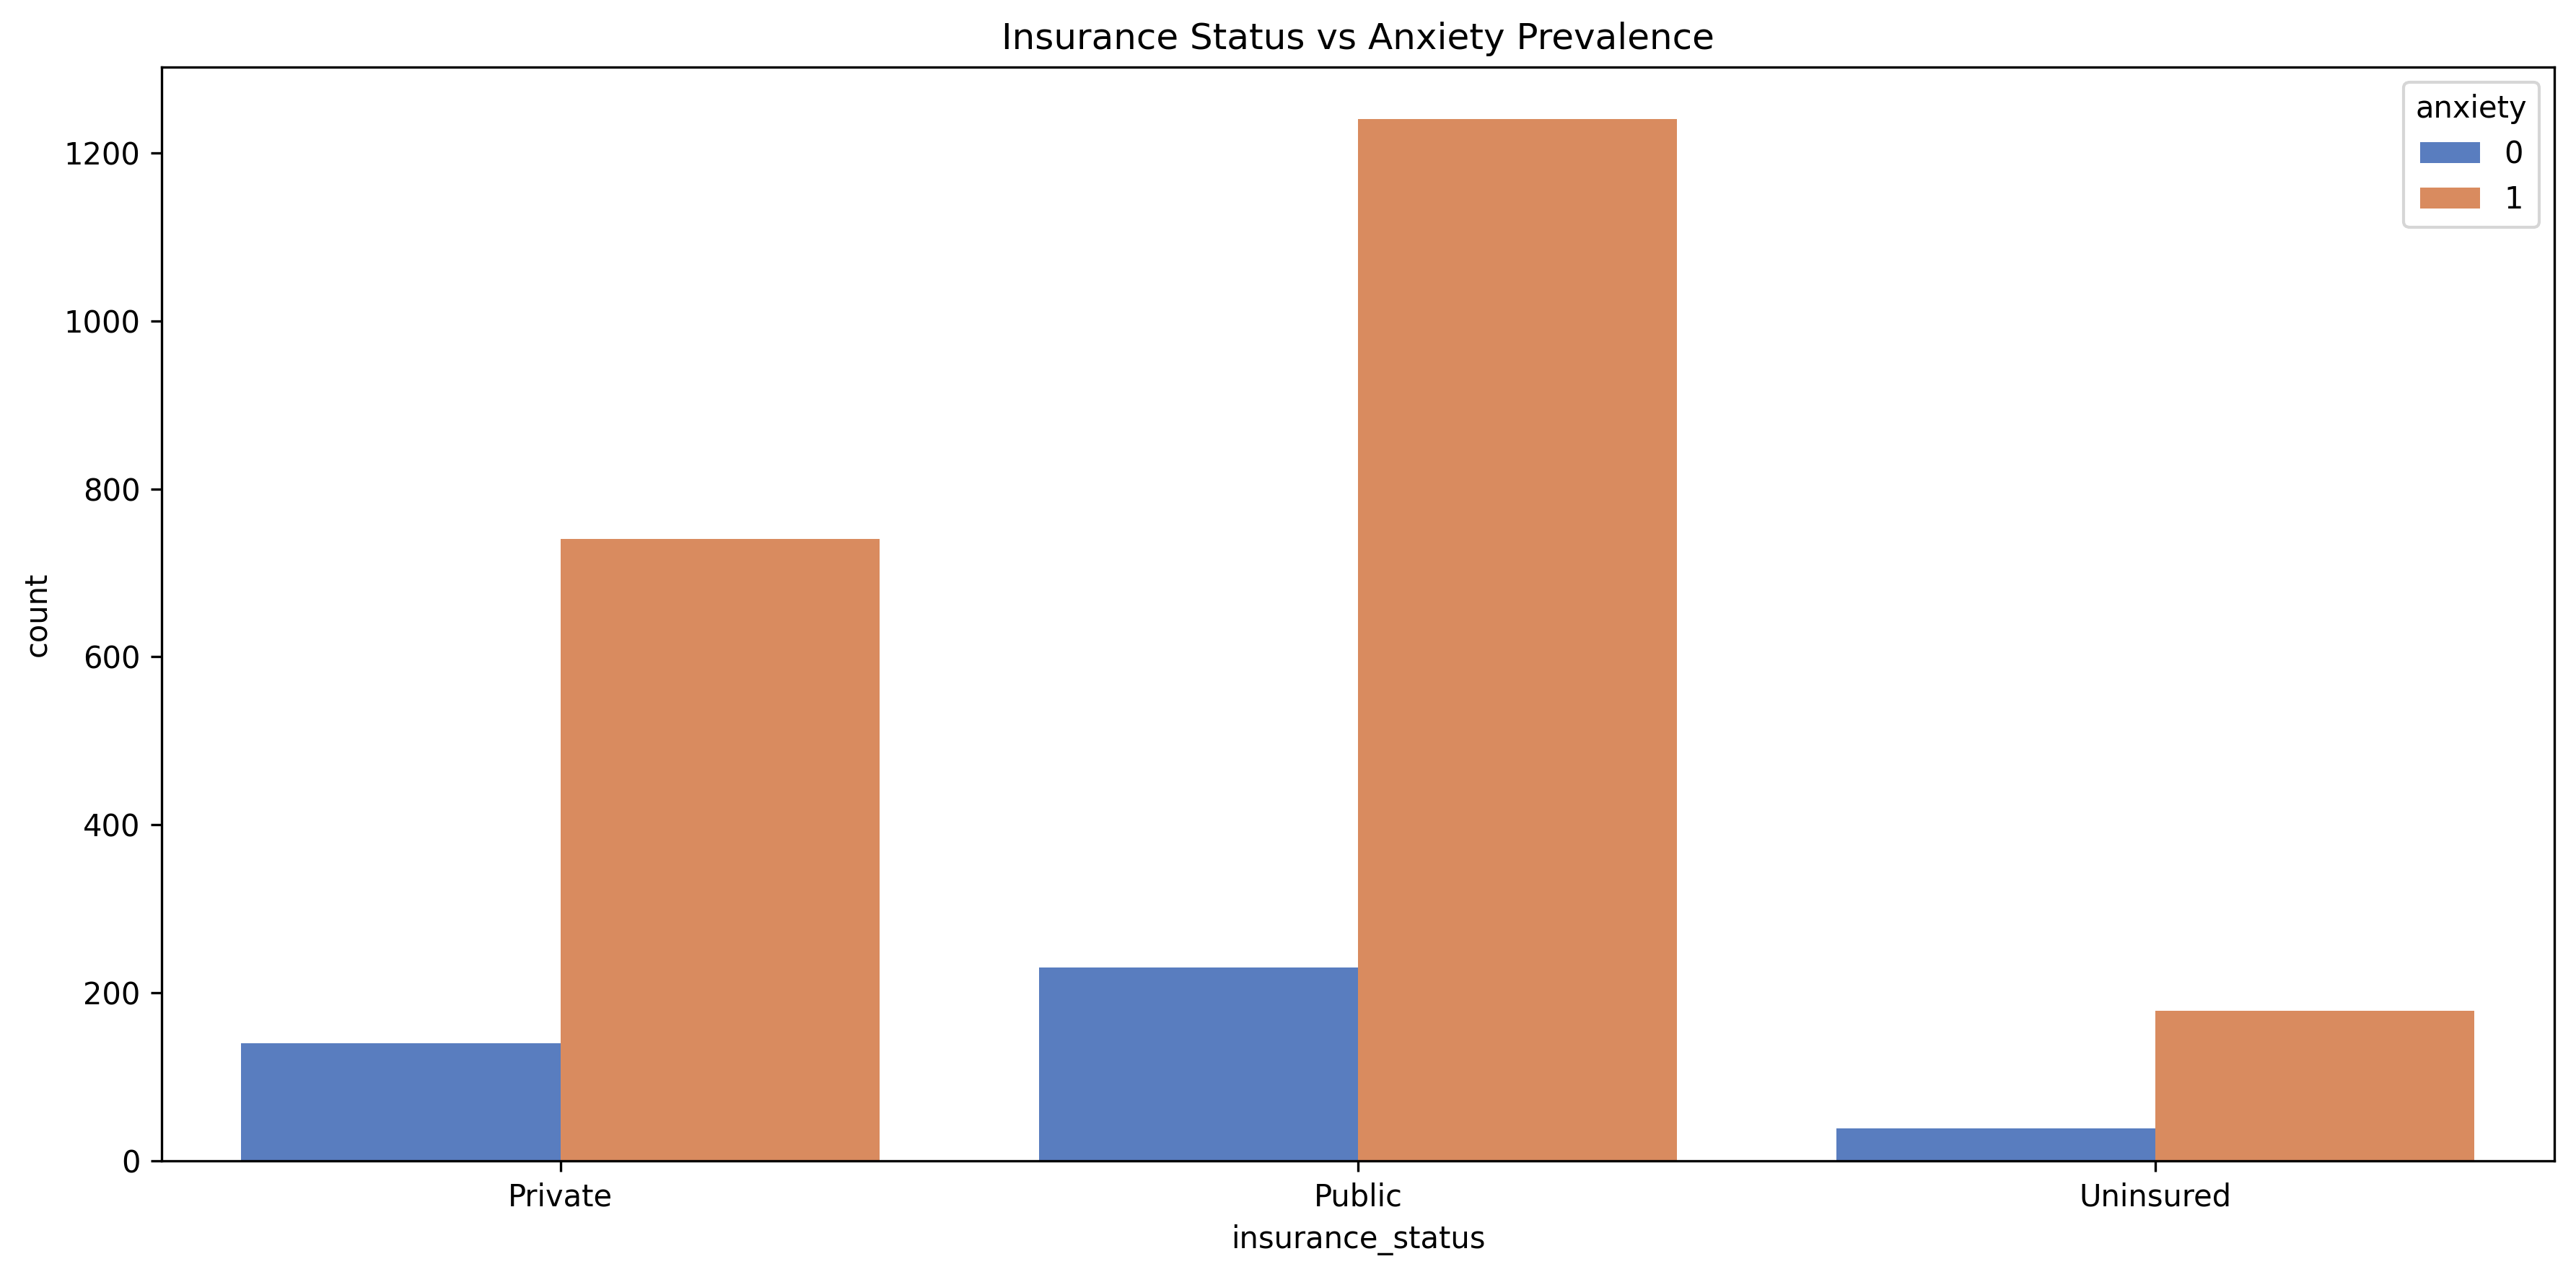

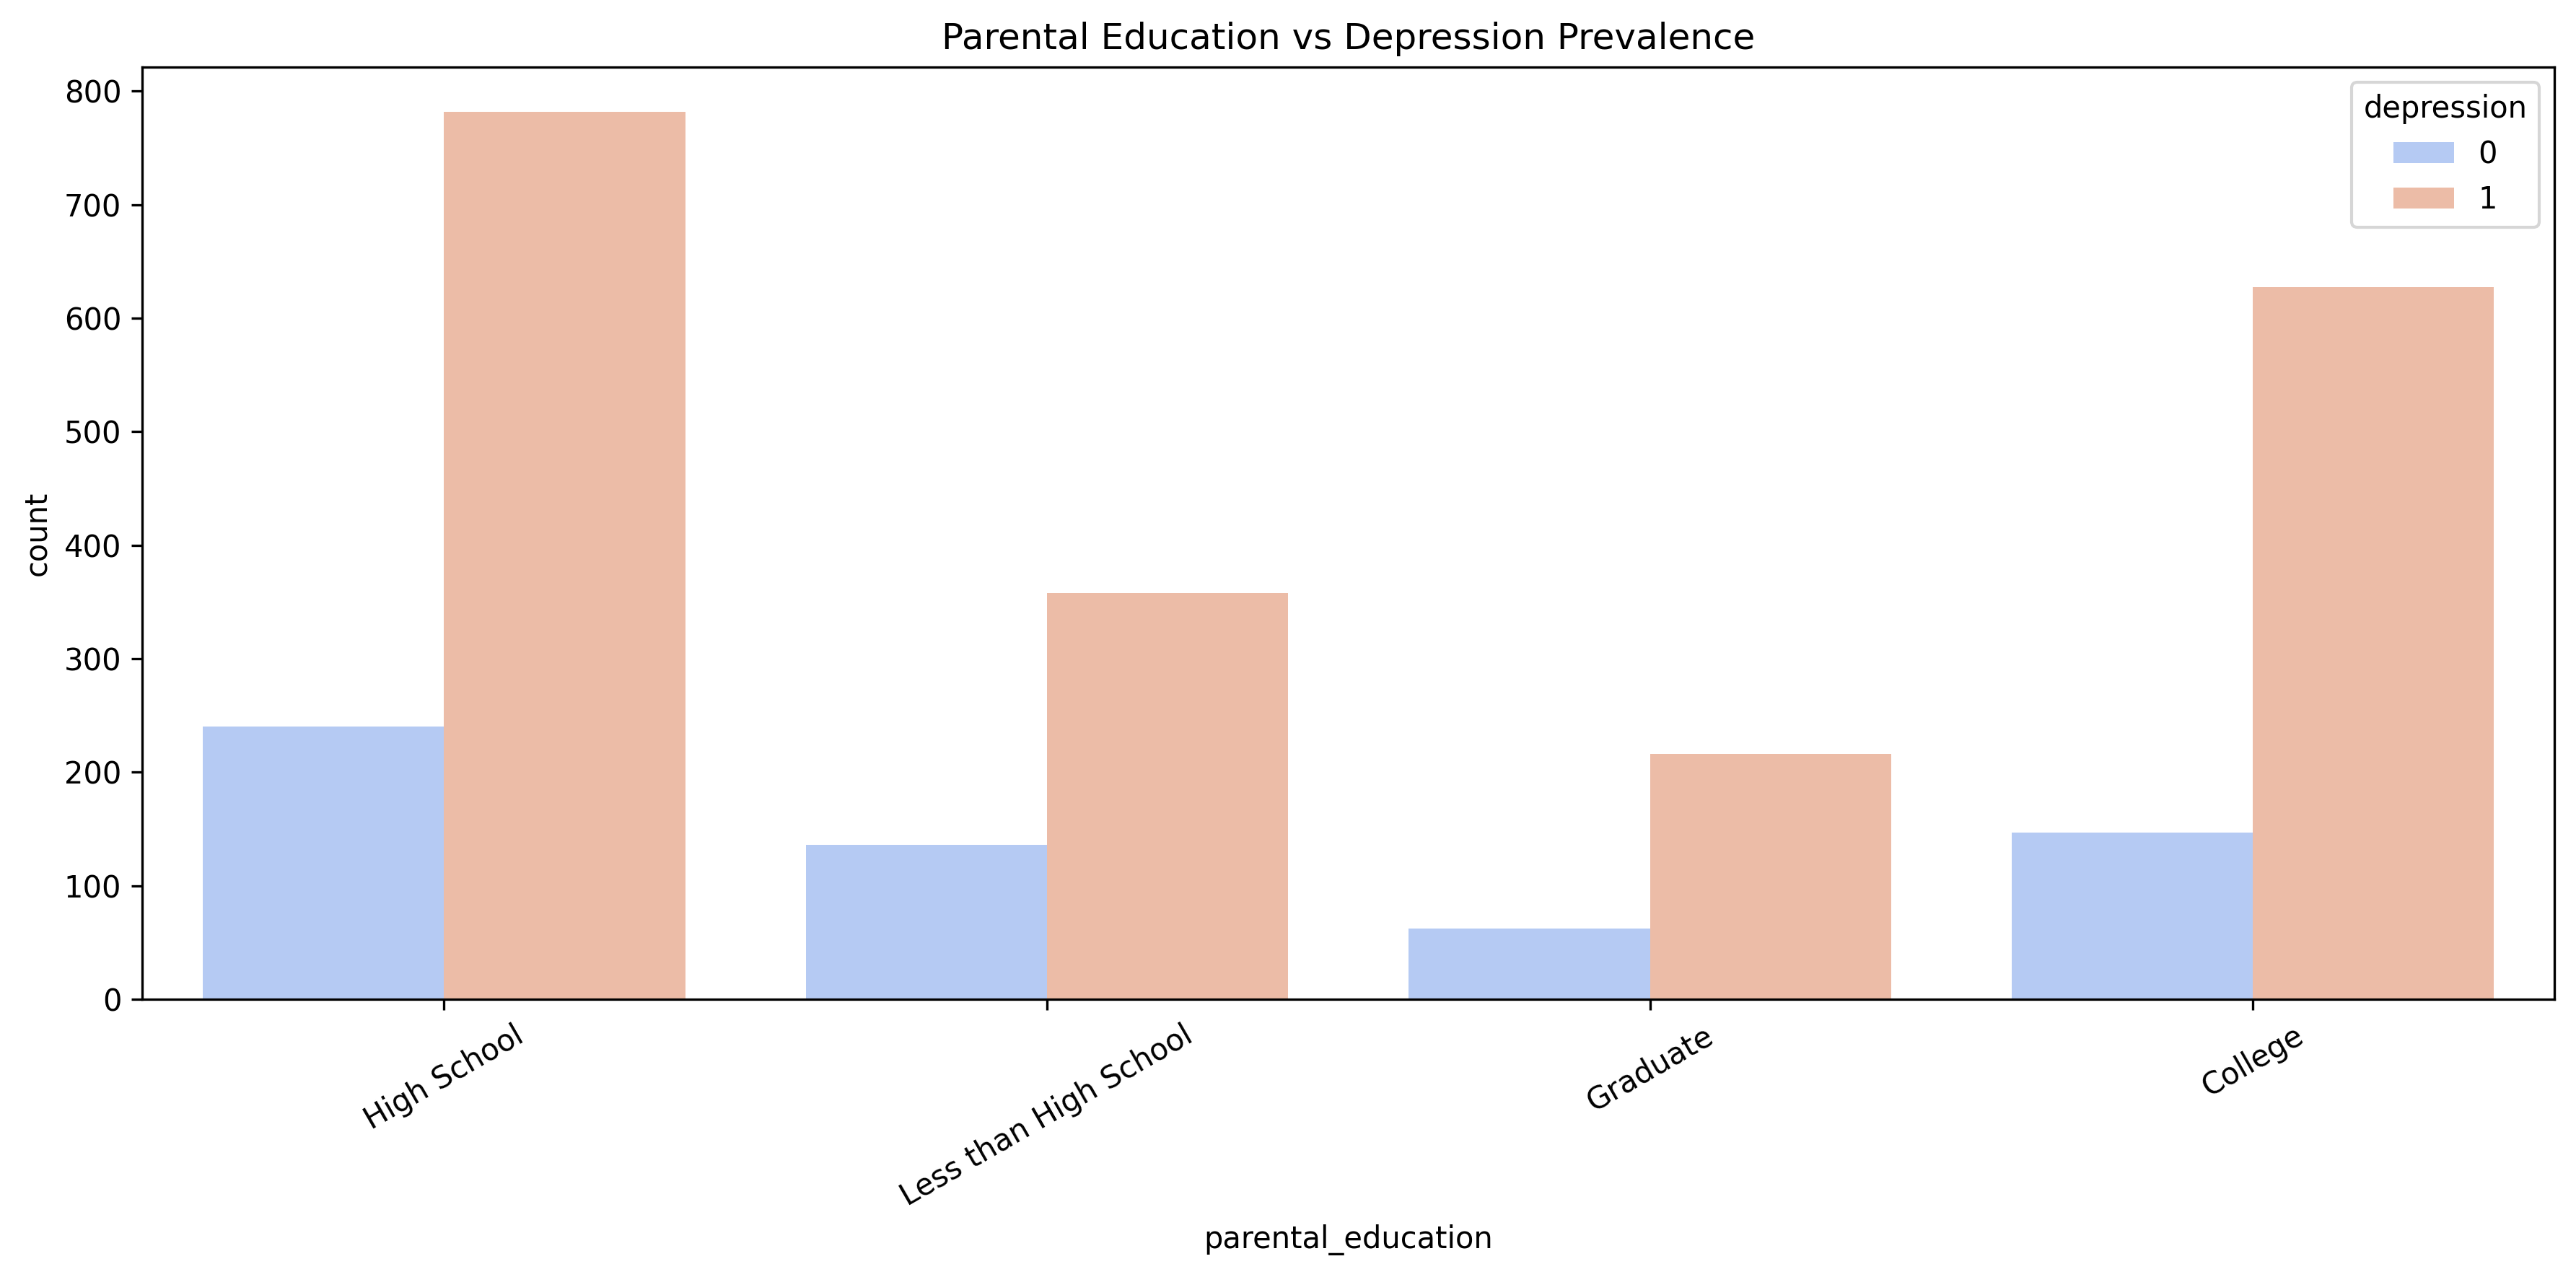

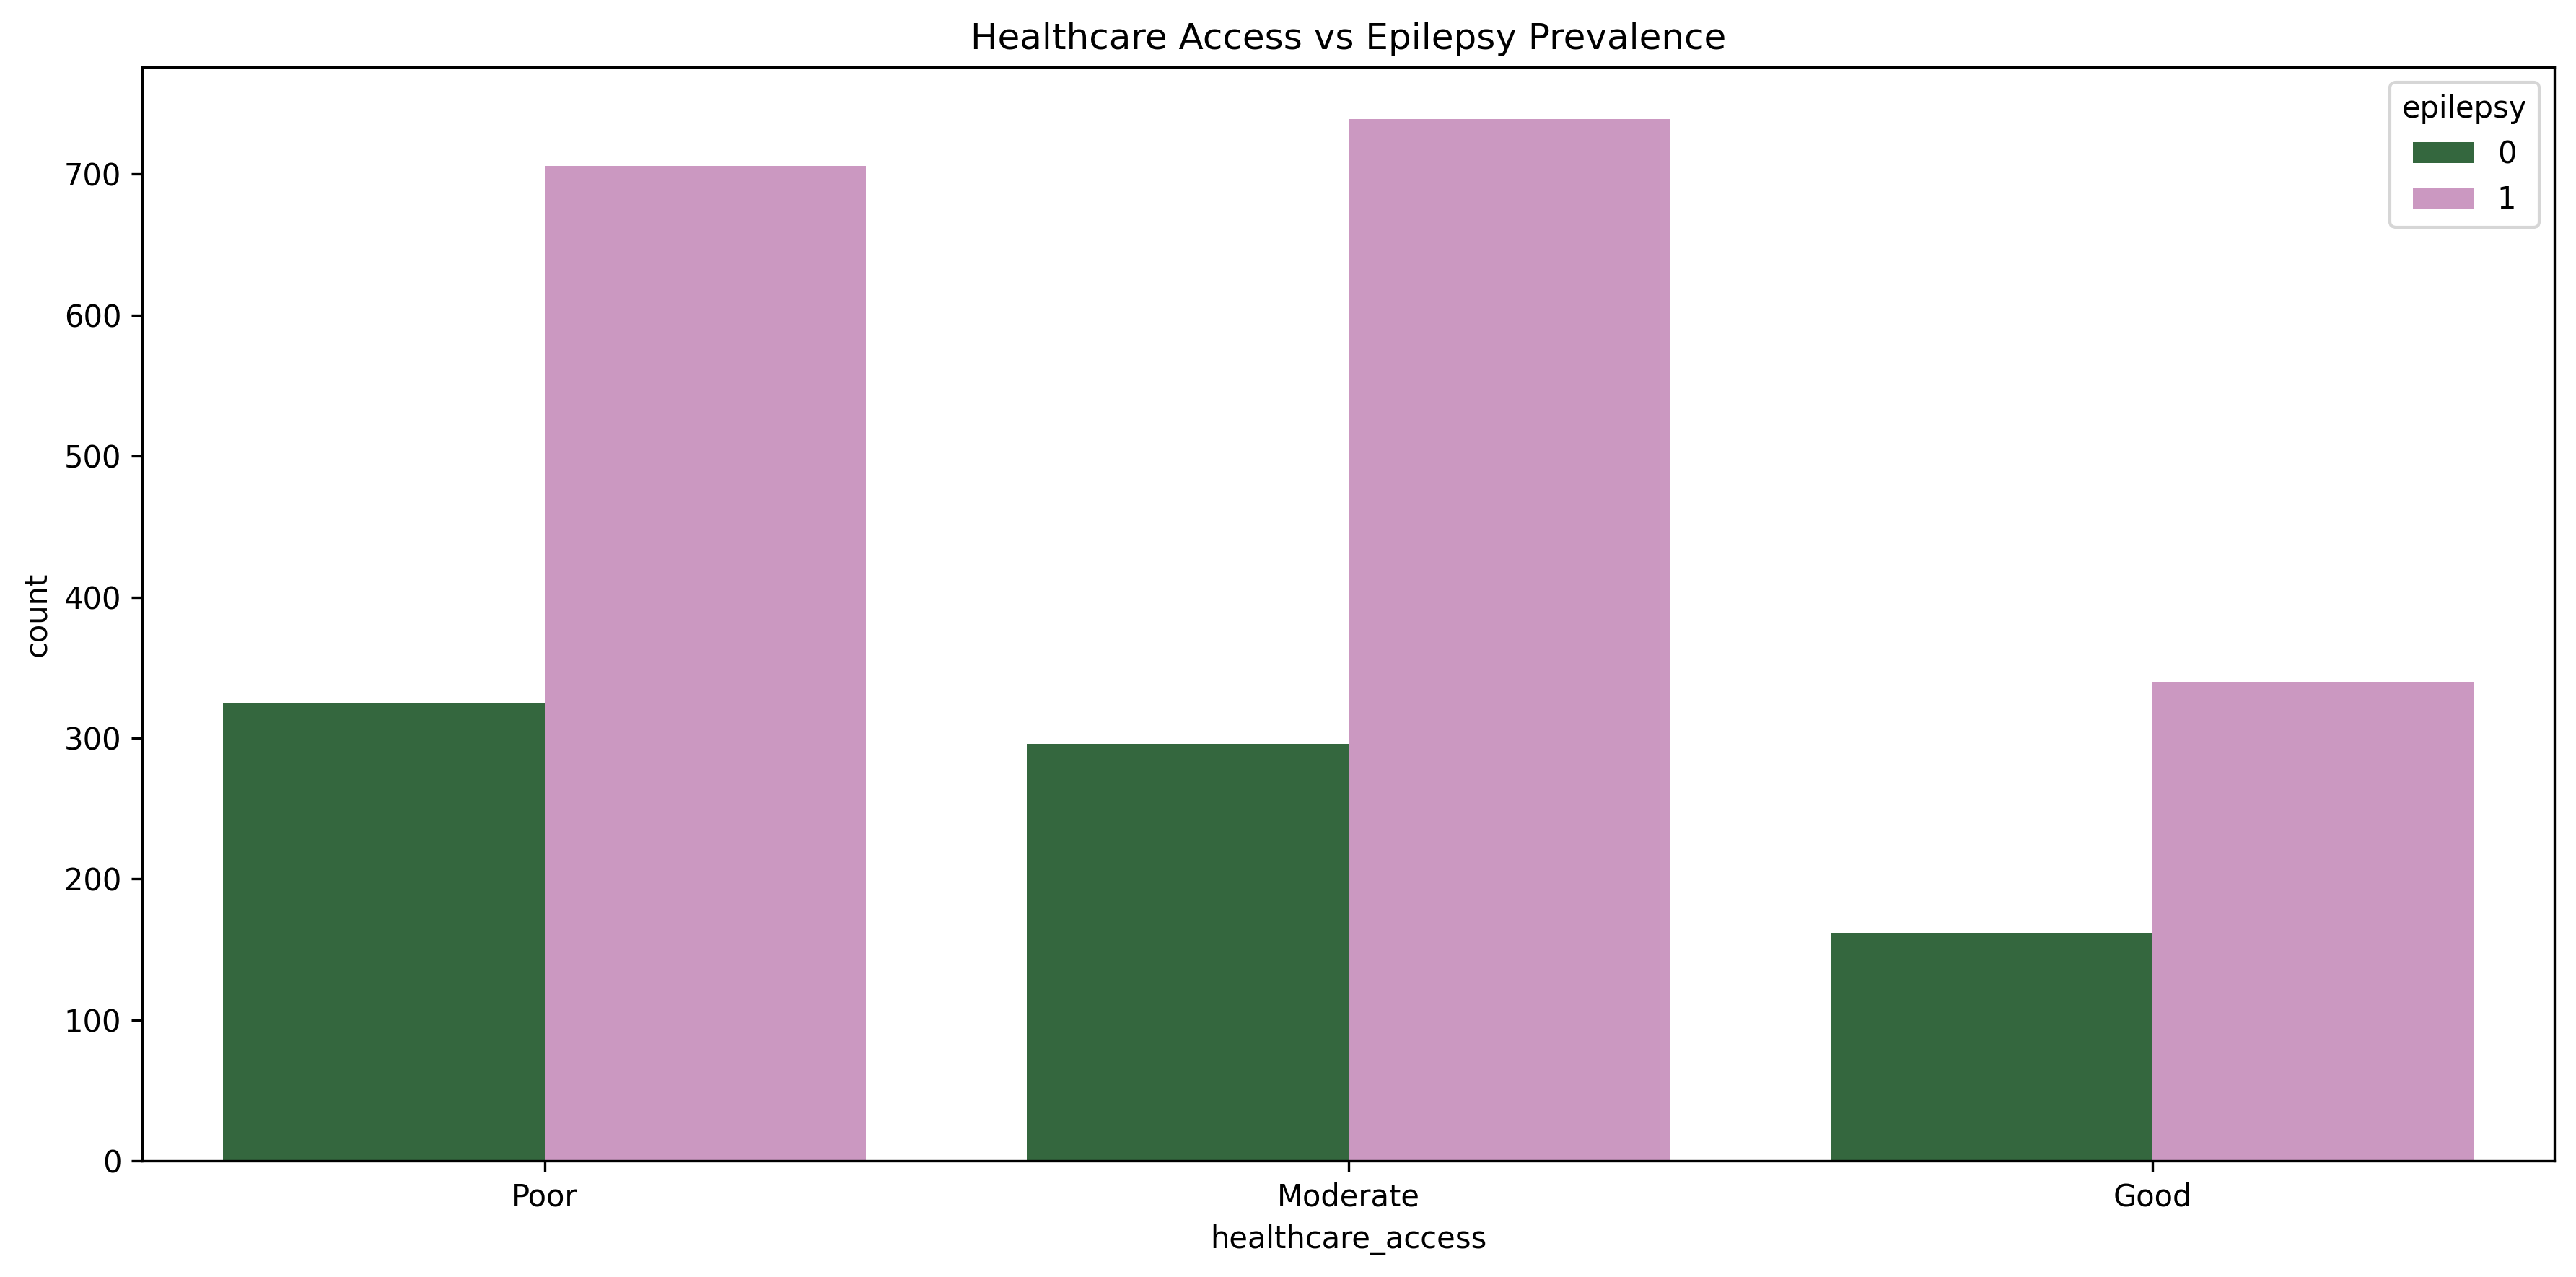


Chi-Square Test for SES vs Comorbidities
  SES vs ADHD --> p-value: 0.0159
  SES vs anxiety --> p-value: 0.2260
  SES vs depression --> p-value: 0.2330
  SES vs epilepsy --> p-value: 0.1540

Chi-Square Test for insurance_status vs Comorbidities
  insurance_status vs ADHD --> p-value: 0.5436
  insurance_status vs anxiety --> p-value: 0.6998
  insurance_status vs depression --> p-value: 0.1077
  insurance_status vs epilepsy --> p-value: 0.0063

Chi-Square Test for parental_education vs Comorbidities
  parental_education vs ADHD --> p-value: 0.0374
  parental_education vs anxiety --> p-value: 0.1813
  parental_education vs depression --> p-value: 0.0047
  parental_education vs epilepsy --> p-value: 0.2821

Chi-Square Test for healthcare_access vs Comorbidities
  healthcare_access vs ADHD --> p-value: 0.8783
  healthcare_access vs anxiety --> p-value: 0.3579
  healthcare_access vs depression --> p-value: 0.4581
  healthcare_access vs epilepsy --> p-value: 0.2213


/tmp/ipython-input-3471067427.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="SES", y="comorbidity_count", palette="YlGnBu")


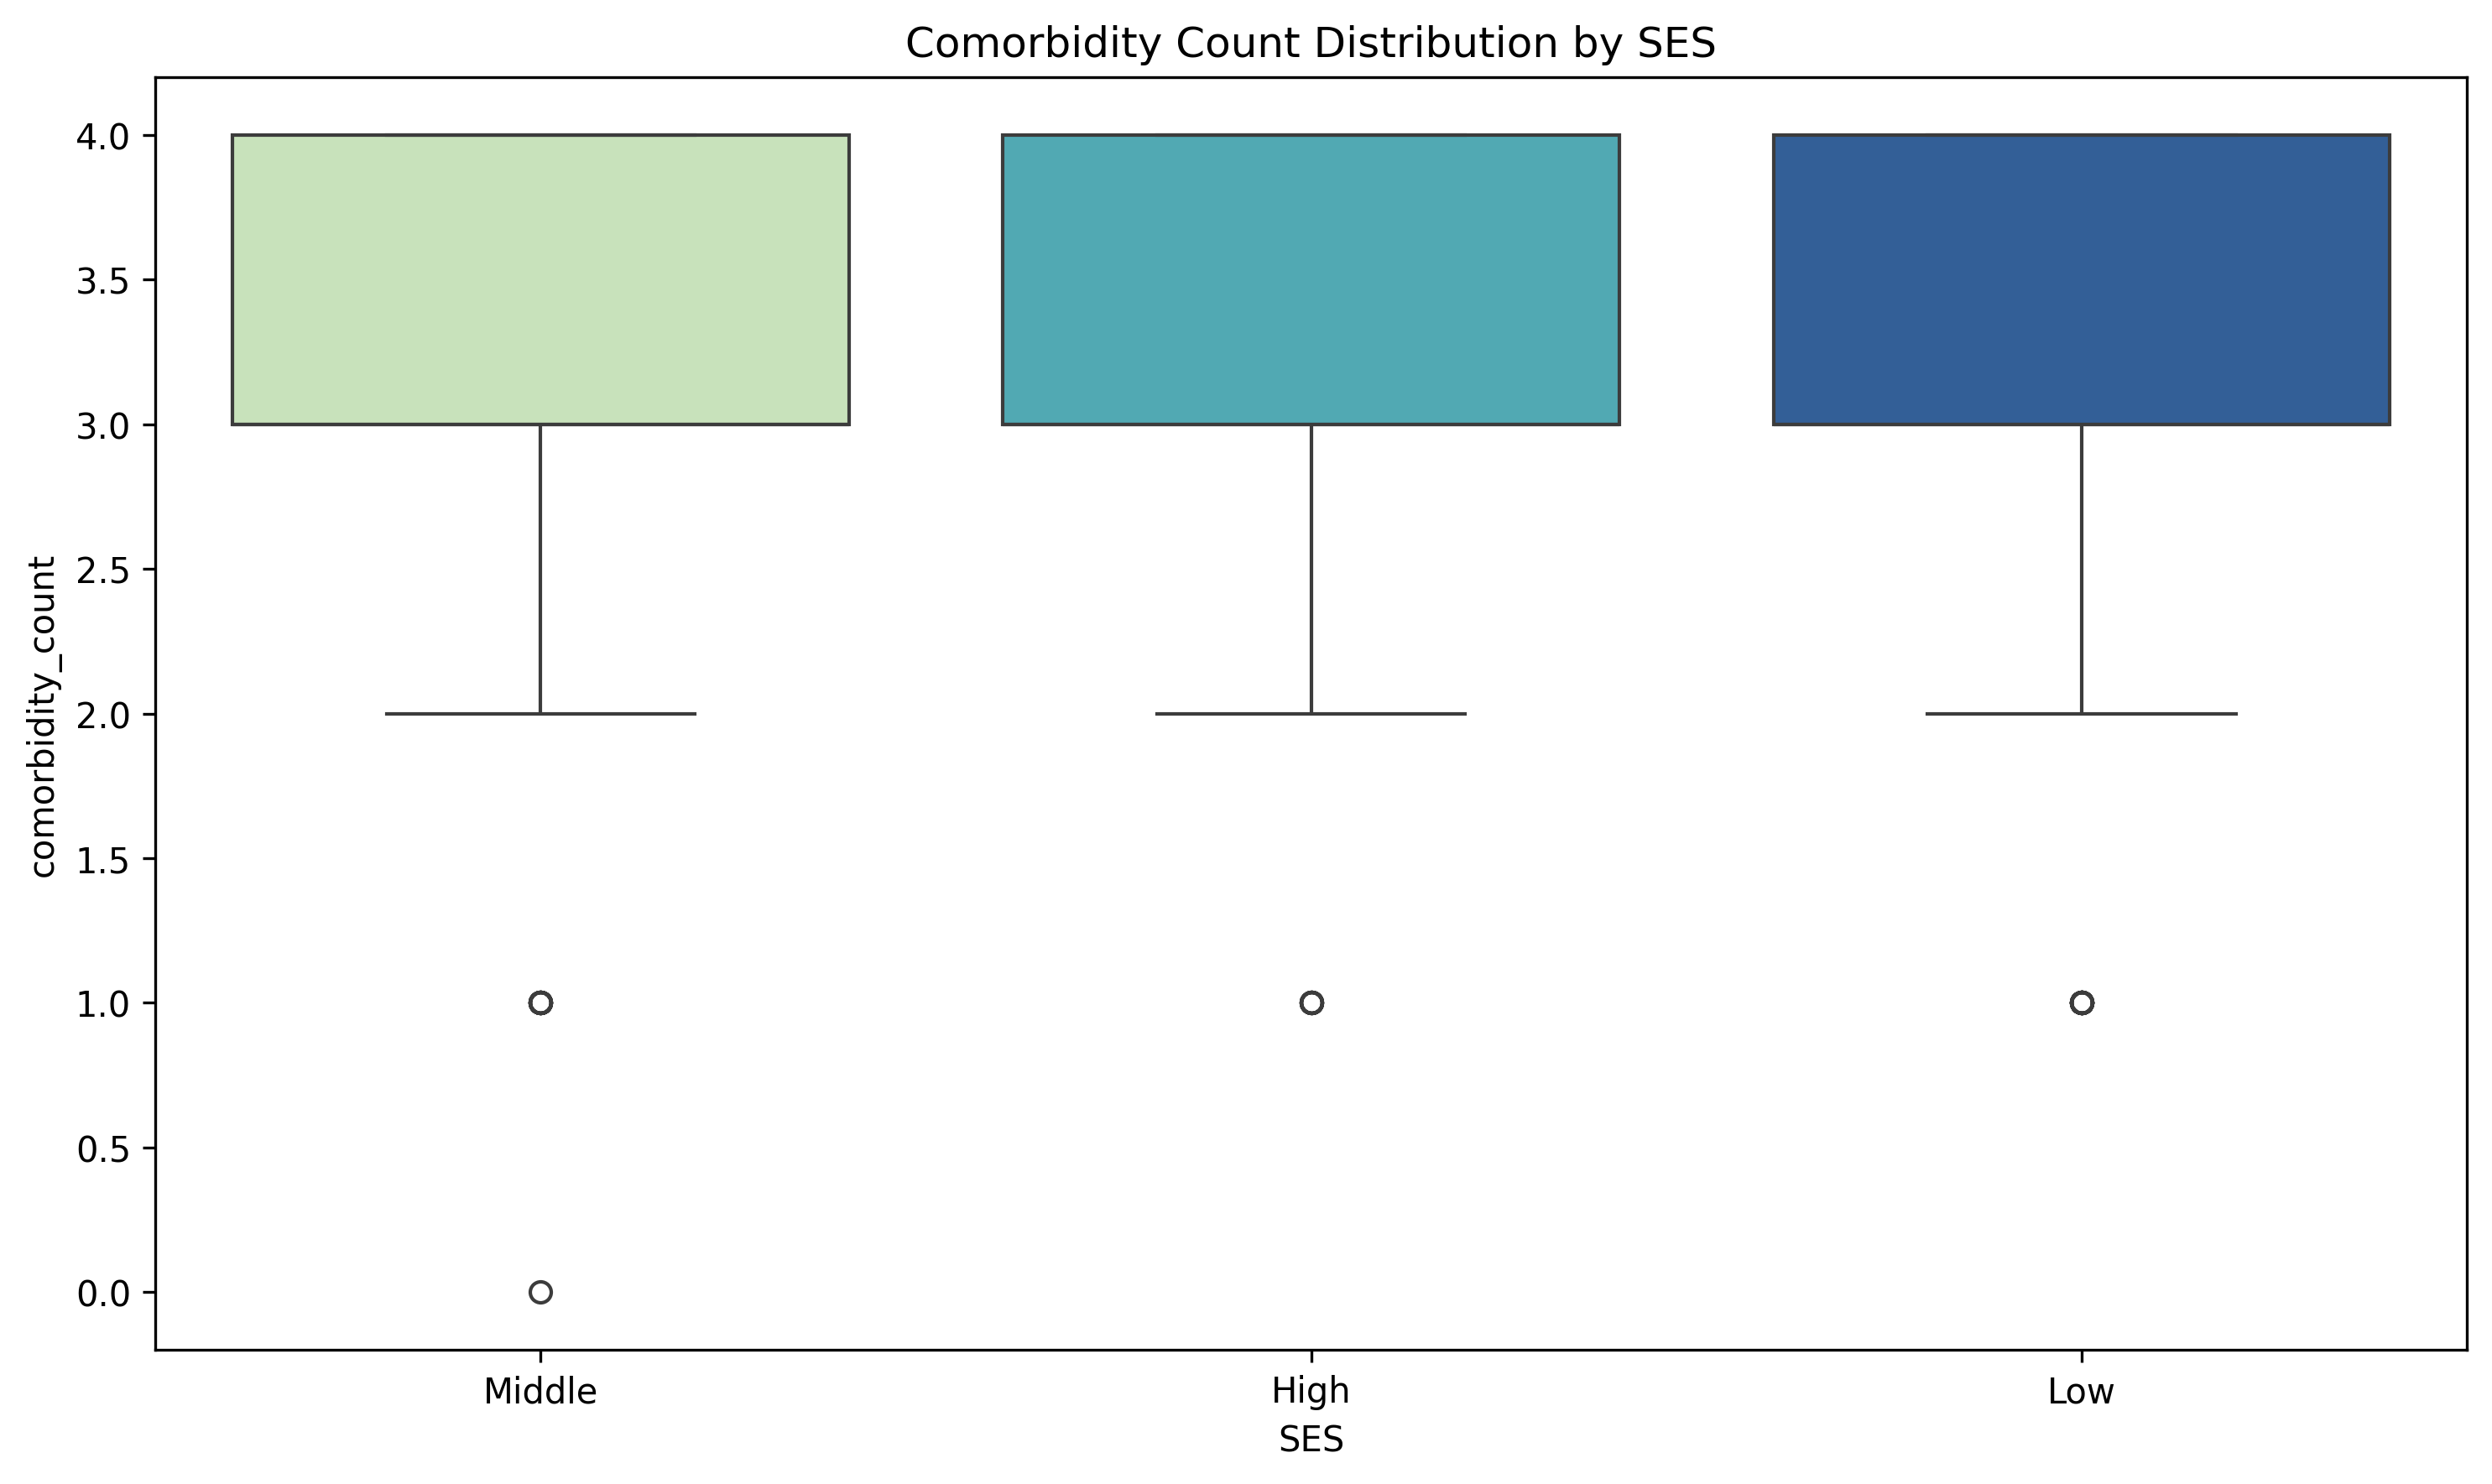

/tmp/ipython-input-3471067427.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="insurance_status", y="comorbidity_count", palette="Set3")


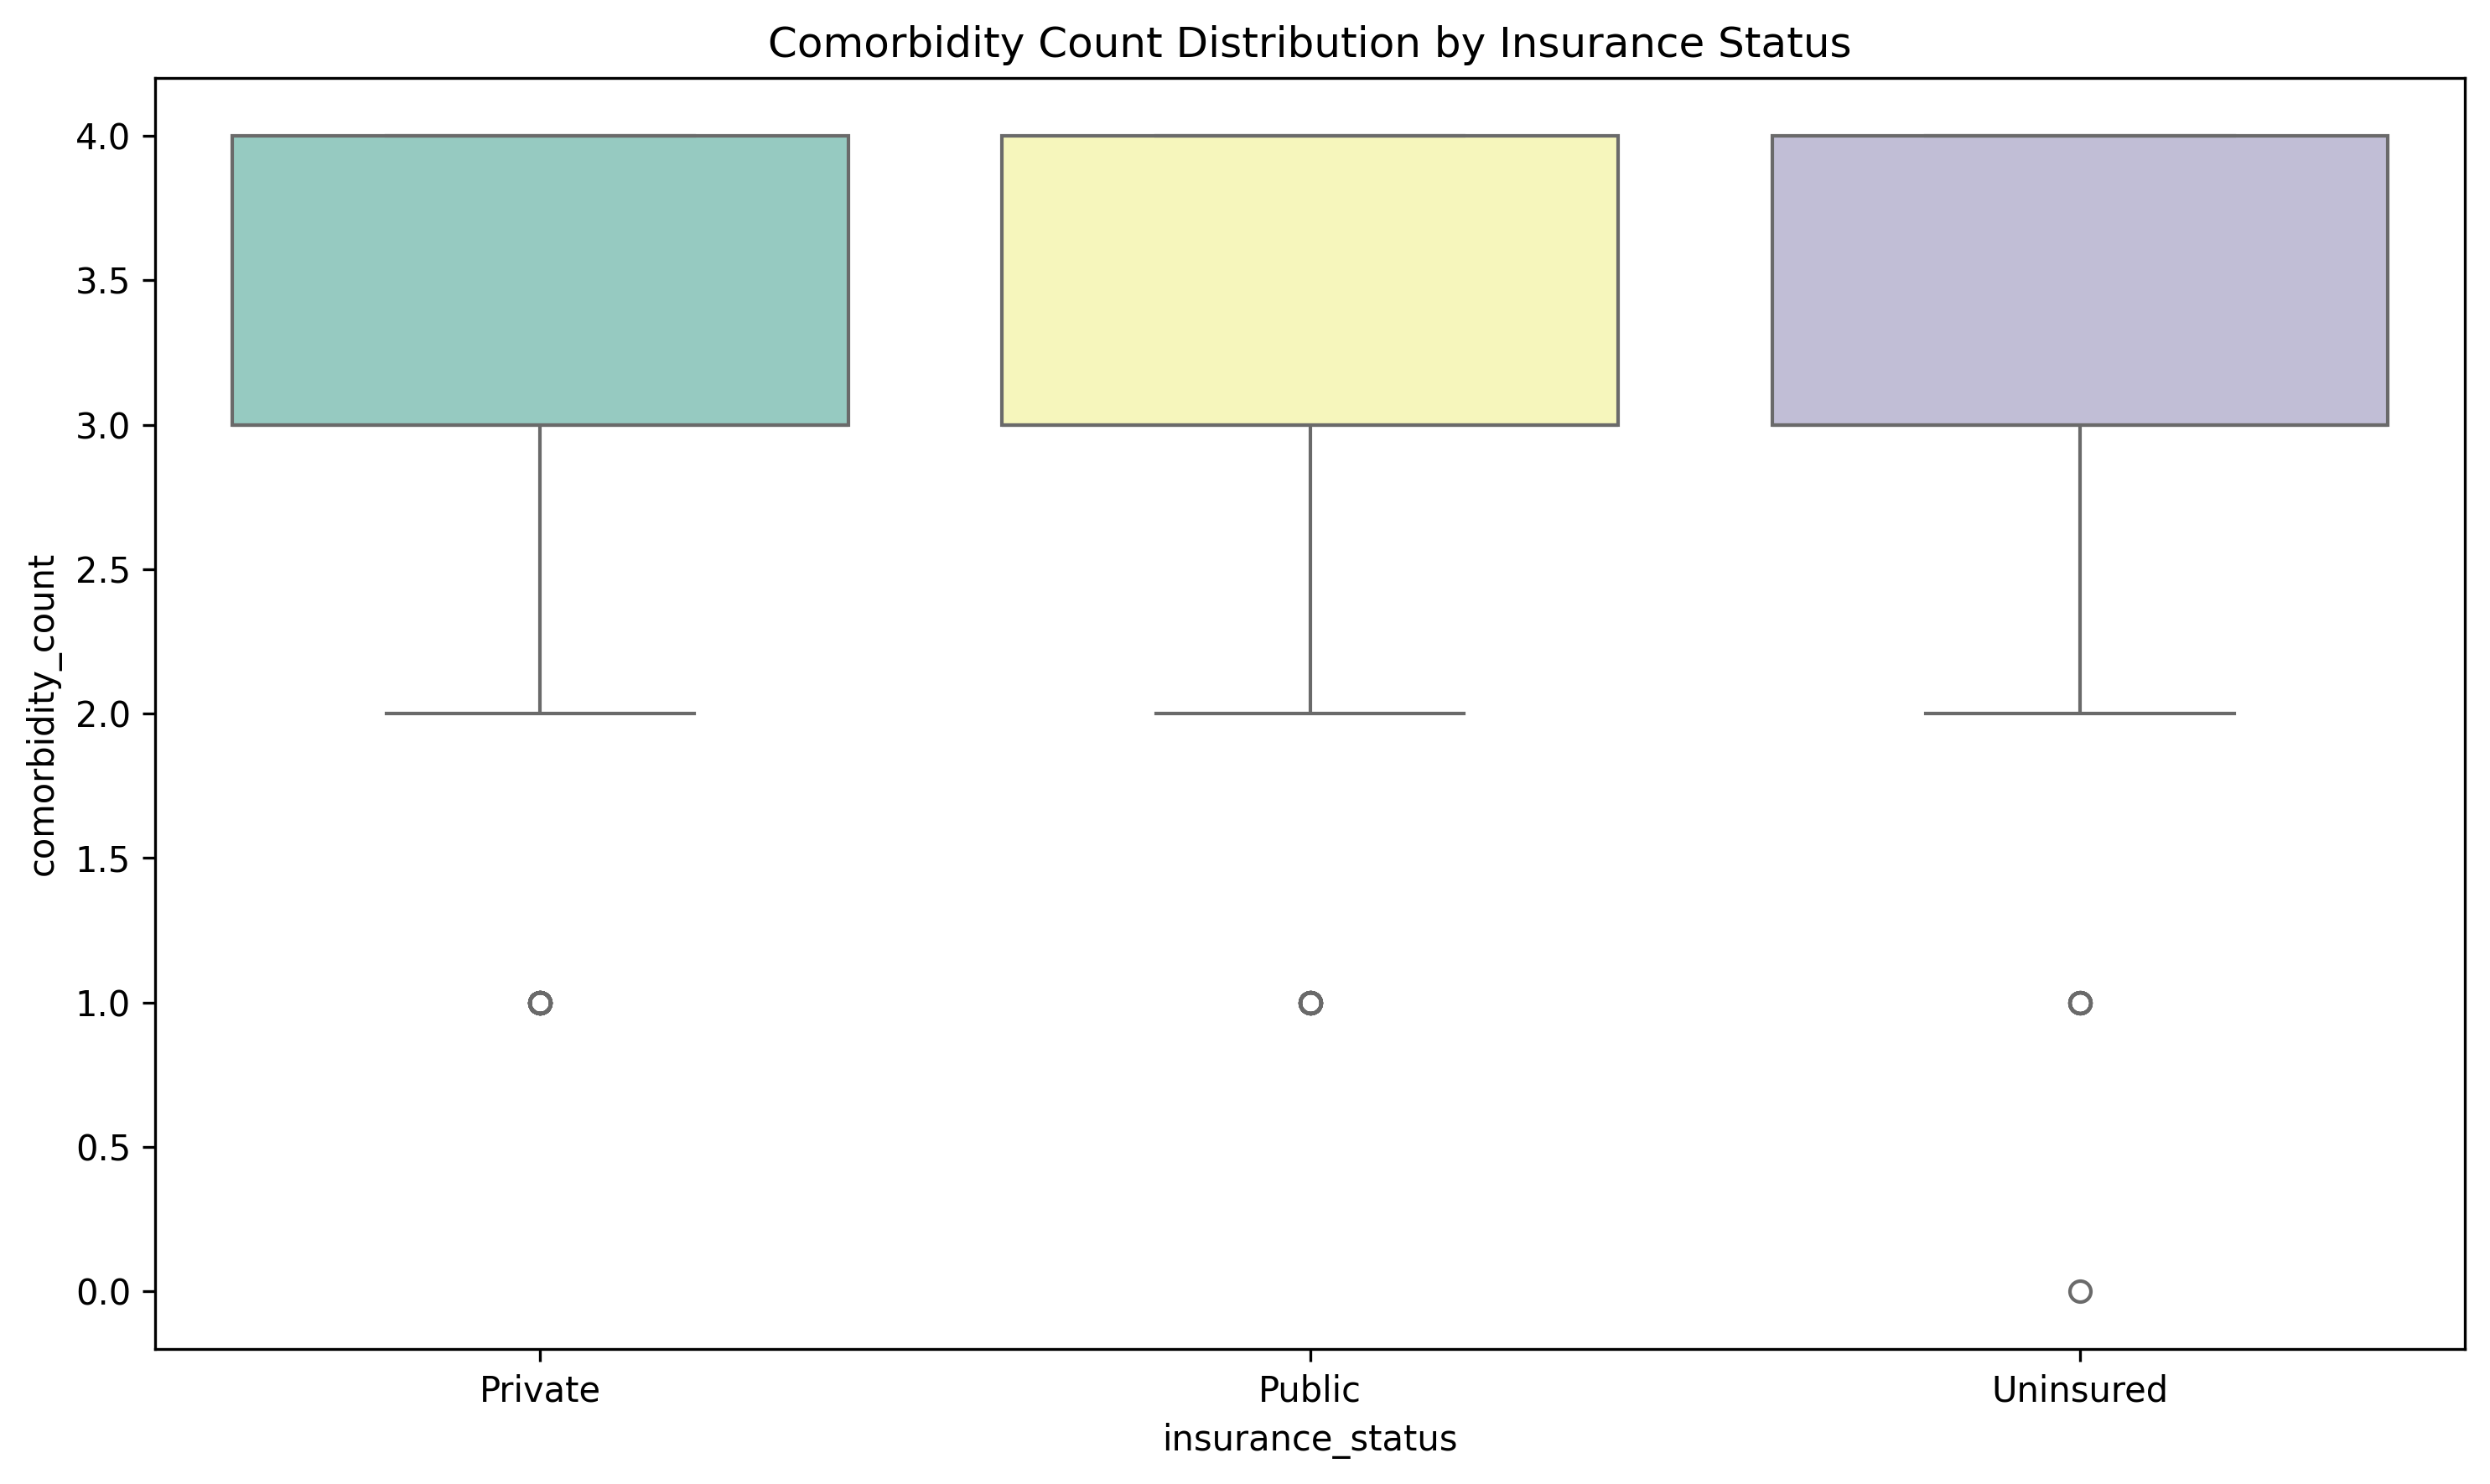

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load dataset
data = pd.read_csv("Autism_SDOH_Comorbidity.csv")

# Display basic info
print("Dataset Loaded Successfully\n")
print("Shape:", data.shape)
print("\nColumns:\n", list(data.columns))
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

# Descriptive Statistics
print("\nSummary Statistics (Numerical):\n")
print(data.describe())

categorical_cols = [
    "gender", "race_ethnicity", "SES", "neighborhood_resources",
    "housing_stability", "insurance_status", "parental_education",
    "neighborhood_characteristics", "healthcare_access"
]

for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n", data[col].value_counts())

# Visualization: Distributions
plt.figure(figsize=(10,5), dpi=300)
sns.histplot(data["age"], bins=15, kde=True, color="teal")
plt.title("Age Distribution of Children")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5), dpi=300)
sns.histplot(data["family_income"], bins=20, kde=True, color="orange")
plt.title("Normalized Family Income Distribution")
plt.xlabel("Family Income (Normalized)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Comorbidity Prevalence
comorbidities = ["ADHD", "anxiety", "depression", "epilepsy"]
comorbidity_rates = data[comorbidities].mean() * 100

plt.figure(figsize=(8,5), dpi=300)
sns.barplot(x=comorbidity_rates.index, y=comorbidity_rates.values, palette="viridis")
plt.title("Prevalence of Comorbidities in Autistic Children (%)")
plt.ylabel("Percentage (%)")
plt.xlabel("Comorbidity")
plt.tight_layout()
plt.show()

print("\nComorbidity Prevalence (%):\n", comorbidity_rates.round(2))

# Correlation Analysis
encoded_data = data.copy()
for col in categorical_cols:
    encoded_data[col] = encoded_data[col].astype("category").cat.codes

corr = encoded_data.corr(numeric_only=True)

plt.figure(figsize=(12,8), dpi=300)
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (SDOH & Comorbidities)")
plt.tight_layout()
plt.show()

print("\nCorrelations of SDOH Predictors with Comorbidities:\n")
corr_with_outcomes = corr[comorbidities].loc[
    ["SES", "parental_education", "insurance_status", "healthcare_access", "family_income"]
]
print(corr_with_outcomes.round(2))

# Categorical vs Comorbidity Relationships
plt.figure(figsize=(12,6), dpi=300)
sns.countplot(data=data, x="SES", hue="ADHD", palette="Set2")
plt.title("SES vs ADHD Prevalence")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6), dpi=300)
sns.countplot(data=data, x="insurance_status", hue="anxiety", palette="muted")
plt.title("Insurance Status vs Anxiety Prevalence")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6), dpi=300)
sns.countplot(data=data, x="parental_education", hue="depression", palette="coolwarm")
plt.title("Parental Education vs Depression Prevalence")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6), dpi=300)
sns.countplot(data=data, x="healthcare_access", hue="epilepsy", palette="cubehelix")
plt.title("Healthcare Access vs Epilepsy Prevalence")
plt.tight_layout()
plt.show()

# Cross-tab and Statistical Test (Chi-Square)
for col in ["SES", "insurance_status", "parental_education", "healthcare_access"]:
    print(f"\nChi-Square Test for {col} vs Comorbidities")
    for disorder in comorbidities:
        ct = pd.crosstab(data[col], data[disorder])
        chi2, p, dof, expected = chi2_contingency(ct)
        print(f"  {col} vs {disorder} --> p-value: {p:.4f}")

# Average Comorbidity Count by SES / Insurance
data["comorbidity_count"] = data[comorbidities].sum(axis=1)

plt.figure(figsize=(10,6), dpi=300)
sns.boxplot(data=data, x="SES", y="comorbidity_count", palette="YlGnBu")
plt.title("Comorbidity Count Distribution by SES")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6), dpi=300)
sns.boxplot(data=data, x="insurance_status", y="comorbidity_count", palette="Set3")
plt.title("Comorbidity Count Distribution by Insurance Status")
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss, classification_report
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv("/content/Autism_SDOH_Comorbidity.csv")

# Define predictors (features) and target (outputs)
target_cols = ["ADHD", "anxiety", "depression", "epilepsy"]
X = data.drop(columns=["Child_ID"] + target_cols)
y = data[target_cols]

# Encode categorical variables
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale continuous variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define and Train Models
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200, random_state=42
    ),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(
        n_estimators=300, learning_rate=0.01, random_state=42
    )
}

# Store evaluation results
results = []

# Train & Evaluate Each Model
for name, model in models.items():
    multi_model = MultiOutputClassifier(model)
    multi_model.fit(X_train, y_train)
    y_pred = multi_model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='micro')
    rec = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    h_loss = hamming_loss(y_test, y_pred)

    results.append({
        "Model": name,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "Hamming Loss": h_loss
    })

    print(f"\n===== {name} =====")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"Hamming Loss: {h_loss:.3f}")
    print("\nClassification Report (per label):")
    print(classification_report(y_test, y_pred, target_names=target_cols))

# Compare Model Performance
results_df = pd.DataFrame(results)
print("\n\nModel Comparison Summary:")
print(results_df.sort_values(by="F1-score", ascending=False).reset_index(drop=True))



===== Random Forest =====
Precision: 0.816
Recall: 0.987
F1-score: 0.893
Hamming Loss: 0.192

Classification Report (per label):
              precision    recall  f1-score   support

        ADHD       0.94      1.00      0.97       483
     anxiety       0.85      1.00      0.92       437
  depression       0.77      0.99      0.87       391
    epilepsy       0.70      0.96      0.81       361

   micro avg       0.82      0.99      0.89      1672
   macro avg       0.81      0.99      0.89      1672
weighted avg       0.82      0.99      0.90      1672
 samples avg       0.82      0.99      0.88      1672


===== Logistic Regression =====
Precision: 0.813
Recall: 1.000
F1-score: 0.897
Hamming Loss: 0.187

Classification Report (per label):
              precision    recall  f1-score   support

        ADHD       0.94      1.00      0.97       483
     anxiety       0.85      1.00      0.92       437
  depression       0.76      1.00      0.86       391
    epilepsy       0.70     

In [ ]:
!pip install shap


SHAP analysis for target: ADHD

SHAP analysis for target: Anxiety

SHAP analysis for target: Depression


/tmp/ipython-input-1705354392.py:31: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/tmp/ipython-input-1705354392.py:31: FutureWarn


SHAP analysis for target: Epilepsy


/tmp/ipython-input-1705354392.py:31: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


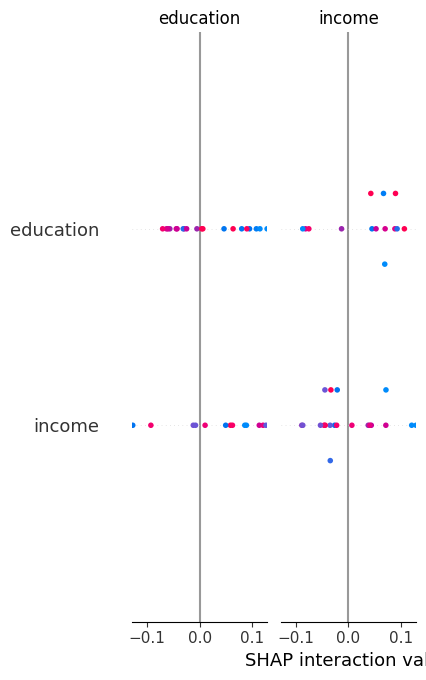

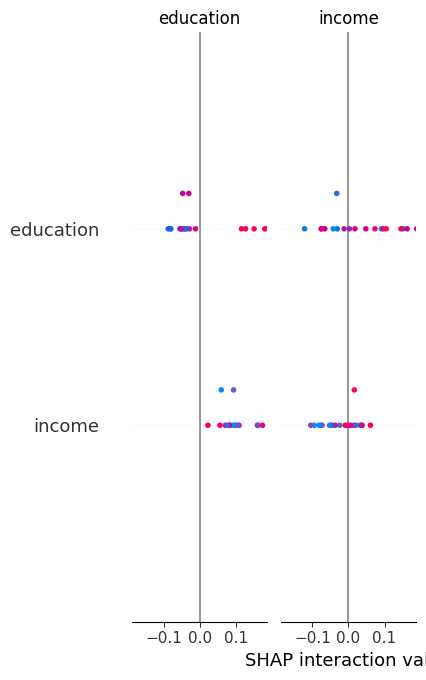

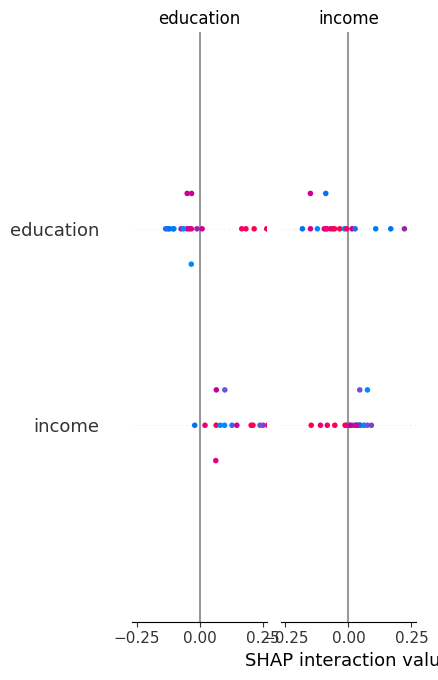

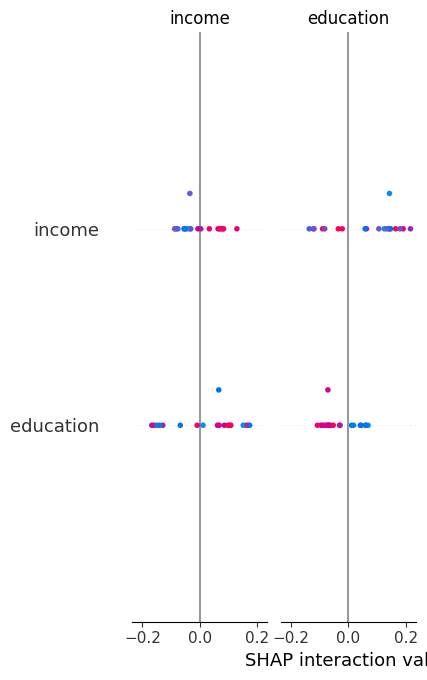

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier

# Load the actual autism dataset
data = pd.read_csv("Autism_SDOH_Comorbidity.csv")

# Define predictors and targets
target_cols = ["ADHD", "anxiety", "depression", "epilepsy"]
X = data.drop(columns=["Child_ID"] + target_cols)
y = data[target_cols]

# Store original feature names before encoding
feature_names = X.columns.tolist()

# Encode categorical variables
cat_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Scale continuous variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create DataFrame with scaled features to maintain feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

# Train Random Forest model (best for SHAP TreeExplainer)
print("Training Random Forest model for SHAP analysis...")
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
multi_rf = MultiOutputClassifier(rf_model)
multi_rf.fit(X_train, y_train)

print("\nModel training complete!")
print(f"Features analyzed: {len(feature_names)}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


In [ ]:
# SHAP Analysis: Feature Importance for Each Comorbidity
# Compute SHAP values for each comorbidity separately

shap_values_dict = {}
explainers_dict = {}

print("Computing SHAP values for each comorbidity...\n")

for i, comorbidity in enumerate(target_cols):
    print(f"Processing {comorbidity.upper()}...")
    
    # Get the individual estimator for this comorbidity
    estimator = multi_rf.estimators_[i]
    
    # Create SHAP explainer
    explainer = shap.TreeExplainer(estimator)
    explainers_dict[comorbidity] = explainer
    
    # Compute SHAP values for test set
    shap_vals = explainer.shap_values(X_test)
    
    # For binary classification, shap_values is a list [class_0, class_1]
    # We want class_1 (positive class)
    if isinstance(shap_vals, list) and len(shap_vals) > 1:
        shap_values_dict[comorbidity] = shap_vals[1]
    else:
        shap_values_dict[comorbidity] = shap_vals
    
    print(f"  ✓ SHAP values computed for {comorbidity}")

print("\n✓ All SHAP values computed successfully!")


In [ ]:
# Visualization 1: Feature Importance Bar Plots (Mean |SHAP|)
# Shows which features are most important for each comorbidity

fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=300)
axes = axes.flatten()

for idx, comorbidity in enumerate(target_cols):
    ax = axes[idx]
    
    # Calculate mean absolute SHAP values
    shap_vals = shap_values_dict[comorbidity]
    mean_abs_shap = np.abs(shap_vals).mean(axis=0)
    
    # Create DataFrame for sorting
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': mean_abs_shap
    }).sort_values('Importance', ascending=True)
    
    # Plot horizontal bar chart
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(importance_df)))
    ax.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
    
    ax.set_xlabel('Mean |SHAP Value| (Feature Importance)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Features', fontsize=11, fontweight='bold')
    ax.set_title(f'Feature Importance for {comorbidity.upper()} Prediction', 
                 fontsize=13, fontweight='bold', pad=15)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Highlight top 3 features
    top_3_features = importance_df.tail(3)['Feature'].values
    for i, (feature, importance) in enumerate(zip(importance_df['Feature'], importance_df['Importance'])):
        if feature in top_3_features:
            ax.get_yticklabels()[i].set_fontweight('bold')
            ax.get_yticklabels()[i].set_color('darkred')

plt.tight_layout()
plt.savefig('feature_importance_all_comorbidities.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Feature importance bar plots created!")


In [ ]:
# Visualization 2: SHAP Summary Plots (Beeswarm)
# Shows the distribution of SHAP values for each feature

print("Creating SHAP summary plots (this may take a moment)...\n")

fig, axes = plt.subplots(2, 2, figsize=(18, 14), dpi=300)
axes = axes.flatten()

for idx, comorbidity in enumerate(target_cols):
    plt.sca(axes[idx])
    
    shap_vals = shap_values_dict[comorbidity]
    
    # Create summary plot
    shap.summary_plot(
        shap_vals, 
        X_test, 
        plot_type="dot",
        show=False,
        max_display=12,
        plot_size=None
    )
    
    axes[idx].set_title(f'SHAP Summary: {comorbidity.upper()}', 
                       fontsize=14, fontweight='bold', pad=10)

plt.tight_layout()
plt.savefig('shap_summary_beeswarm_all.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ SHAP summary plots (beeswarm) created!")


In [ ]:
# Top Features Summary Table
# Shows the most influential SDOH features for each comorbidity

print("\n" + "="*80)
print("TOP 5 MOST INFLUENTIAL FEATURES FOR EACH COMORBIDITY")
print("="*80 + "\n")

top_features_summary = {}

for comorbidity in target_cols:
    shap_vals = shap_values_dict[comorbidity]
    mean_abs_shap = np.abs(shap_vals).mean(axis=0)
    
    # Create sorted DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': mean_abs_shap
    }).sort_values('Importance', ascending=False)
    
    top_5 = importance_df.head(5)
    top_features_summary[comorbidity] = top_5
    
    print(f"\n{comorbidity.upper()}:")
    print("-" * 60)
    for rank, (idx, row) in enumerate(top_5.iterrows(), 1):
        print(f"  {rank}. {row['Feature']:<35} (Importance: {row['Importance']:.4f})")

print("\n" + "="*80)

# Identify SDOH features that appear in top 5 across all comorbidities
sdoh_keywords = ['income', 'education', 'SES', 'insurance', 'healthcare', 'housing', 'neighborhood']
consistent_features = set()

for comorbidity in target_cols:
    top_5_features = set(top_features_summary[comorbidity]['Feature'].values)
    if len(consistent_features) == 0:
        consistent_features = top_5_features
    else:
        consistent_features = consistent_features.intersection(top_5_features)

if consistent_features:
    print(f"\n🔍 FEATURES CONSISTENTLY IN TOP 5 ACROSS ALL COMORBIDITIES:")
    for feat in consistent_features:
        print(f"   • {feat}")
else:
    print("\n🔍 No features appear in top 5 for all comorbidities")


In [ ]:
# Visualization 3: Comprehensive Feature Importance Comparison Across Comorbidities
# Grouped bar chart showing how each SDOH feature affects different comorbidities

# Collect importance scores for all features across all comorbidities
importance_matrix = []

for comorbidity in target_cols:
    shap_vals = shap_values_dict[comorbidity]
    mean_abs_shap = np.abs(shap_vals).mean(axis=0)
    importance_matrix.append(mean_abs_shap)

importance_df = pd.DataFrame(
    importance_matrix,
    columns=feature_names,
    index=target_cols
).T

# Sort by average importance across all comorbidities
importance_df['Average'] = importance_df.mean(axis=1)
importance_df_sorted = importance_df.sort_values('Average', ascending=False).head(10)
importance_df_sorted = importance_df_sorted.drop('Average', axis=1)

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

x = np.arange(len(importance_df_sorted))
width = 0.2
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for i, comorbidity in enumerate(target_cols):
    offset = width * (i - 1.5)
    bars = ax.bar(x + offset, importance_df_sorted[comorbidity], width, 
                   label=comorbidity.upper(), color=colors[i], alpha=0.8)

ax.set_xlabel('SDOH Features', fontsize=13, fontweight='bold')
ax.set_ylabel('Mean |SHAP Value| (Feature Importance)', fontsize=13, fontweight='bold')
ax.set_title('Comparative Feature Importance Across All Comorbidities\n(Top 10 Most Influential SDOH Factors)', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(importance_df_sorted.index, rotation=45, ha='right', fontsize=10)
ax.legend(loc='upper right', framealpha=0.9, fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Comprehensive comparison visualization created!")


In [ ]:
# Visualization 4: Heatmap of Feature Importance Across Comorbidities
# Shows which features are important for which comorbidities

# Create full importance matrix
importance_matrix = []
for comorbidity in target_cols:
    shap_vals = shap_values_dict[comorbidity]
    mean_abs_shap = np.abs(shap_vals).mean(axis=0)
    importance_matrix.append(mean_abs_shap)

importance_df_full = pd.DataFrame(
    importance_matrix,
    columns=feature_names,
    index=[c.upper() for c in target_cols]
).T

# Sort by maximum importance across any comorbidity
importance_df_full['Max'] = importance_df_full.max(axis=1)
importance_df_display = importance_df_full.sort_values('Max', ascending=False).drop('Max', axis=1)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

import seaborn as sns
sns.heatmap(
    importance_df_display,
    annot=True,
    fmt='.3f',
    cmap='YlOrRd',
    cbar_kws={'label': 'Mean |SHAP Value|'},
    linewidths=0.5,
    ax=ax
)

ax.set_xlabel('Comorbidity', fontsize=12, fontweight='bold')
ax.set_ylabel('SDOH Features', fontsize=12, fontweight='bold')
ax.set_title('Heatmap: Feature Importance for Each Comorbidity\n(All Features Ranked by Maximum Impact)', 
             fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.savefig('feature_importance_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Feature importance heatmap created!")


In [ ]:
# Figure 1.1: Performance Metrics Comparison (Publication Quality)
# This recreates the figure from the research paper

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss
from xgboost import XGBClassifier

# Load data
data = pd.read_csv("Autism_SDOH_Comorbidity.csv")

# Prepare data
target_cols = ["ADHD", "anxiety", "depression", "epilepsy"]
X = data.drop(columns=["Child_ID"] + target_cols)
y = data[target_cols]

# Encode categorical variables
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=300, learning_rate=0.01, random_state=42, eval_metric='logloss')
}

results = []

for name, model in models.items():
    multi_model = MultiOutputClassifier(model)
    multi_model.fit(X_train, y_train)
    y_pred = multi_model.predict(X_test)
    
    results.append({
        "Model": name,
        "Precision": precision_score(y_test, y_pred, average='micro'),
        "Recall": recall_score(y_test, y_pred, average='micro'),
        "F1-score": f1_score(y_test, y_pred, average='micro'),
        "Hamming Loss": hamming_loss(y_test, y_pred)
    })

results_df = pd.DataFrame(results)

# Create Figure 1.1
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

metrics = ['Precision', 'Recall', 'F1-score', 'Hamming Loss']
x = np.arange(len(results_df))
width = 0.2

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for i, metric in enumerate(metrics):
    offset = width * (i - 1.5)
    bars = ax.bar(x + offset, results_df[metric], width, 
                   label=metric, color=colors[i], alpha=0.9, 
                   edgecolor='black', linewidth=0.5)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('Performance Metrics of Multi-Output Classification Models\nPredicting Comorbidities (ADHD, Anxiety, Depression, Epilepsy) in ASD-Positive Children', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], fontsize=12, fontweight='bold')
ax.legend(loc='upper left', framealpha=0.95, fontsize=11, edgecolor='black')
ax.set_ylim(0, 1.15)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Figure_1_1_Model_Performance_Comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Print results table
print("\n" + "="*80)
print("FIGURE 1.1: MODEL PERFORMANCE METRICS")
print("="*80)
print("\n" + results_df.to_string(index=False))
print("\n" + "="*80)

print("\n✓ Figure 1.1 has been generated and saved as 'Figure_1_1_Model_Performance_Comparison.png'")
print("\nKey Findings:")
print(f"  • Best Precision: {results_df['Model'][results_df['Precision'].idxmax()]} ({results_df['Precision'].max():.5f})")
print(f"  • Best Recall: {results_df['Model'][results_df['Recall'].idxmax()]} ({results_df['Recall'].max():.5f})")
print(f"  • Best F1-score: {results_df['Model'][results_df['F1-score'].idxmax()]} ({results_df['F1-score'].max():.5f})")
print(f"  • Lowest Hamming Loss: {results_df['Model'][results_df['Hamming Loss'].idxmin()]} ({results_df['Hamming Loss'].min():.5f})")
